## –ú–æ–¥–µ–ª–∏ –ø—Ä–æ–≥–Ω–æ–∑–∏—Ä–æ–≤–∞–Ω–∏—è –∫–æ–ª–∏—á–µ—Å—Ç–≤–∞ —è–∏—Ü –ø–æ –ê–∫–º–æ–ª–∏–Ω—Å–∫–æ–π –æ–±–ª–∞—Å—Ç–∏

In [24]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.stattools import kpss
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX

from pmdarima import auto_arima
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from pylab import rcParams
from IPython.display import display
import math
from prophet import Prophet
pd.set_option('display.max_columns', 130)


import warnings
from statsmodels.tools.sm_exceptions import InterpolationWarning
warnings.simplefilter("ignore", category=InterpolationWarning)
warnings.filterwarnings("ignore", category=FutureWarning)

### –ü–æ–¥–≥–æ—Ç–æ–≤–∫–∞ –¥–∞–Ω–Ω—ã—Ö –∏ EDA

In [25]:
df = pd.read_excel("–î–∞—Ç–∞—Å–µ—Ç –ø–æ —è–π—Ü–∞–º.xlsx")
df = df[['–†–µ–≥–∏–æ–Ω', '–ü–µ—Ä–∏–æ–¥', '–Ø–π—Ü–∞', '–û—Å–∞–¥–∫–∏', '–ü–æ–≥–æ–ª–æ–≤—å–µ: –ø—Ç–∏—Ü–∞ –¥–æ–º–∞—à–Ω—è—è', '–¢–µ–º–ø–µ—Ä–∞—Ç—É—Ä–∞']]
df.sample(10)

–†–µ–≥–∏–æ–Ω   –ü–µ—Ä–∏–æ–¥     –Ø–π—Ü–∞  –û—Å–∞–¥–∫–∏  \
1447  –ö–´–ó–´–õ–û–†–î–ò–ù–°–ö–ê–Ø –û–ë–õ–ê–°–¢–¨  2019-01    581.3    19.4   
180      –ê–ö–¢–Æ–ë–ò–ù–°–ö–ê–Ø –û–ë–õ–ê–°–¢–¨  2020-01  19740.8    30.1   
1774    –ü–ê–í–õ–û–î–ê–†–°–ö–ê–Ø –û–ë–õ–ê–°–¢–¨  2018-07  19774.8    60.4   
807                  –ì–ê–°–¢–ê–ù–ê  2022-04      0.3     7.1   
141      –ê–ö–¢–Æ–ë–ò–ù–°–ö–ê–Ø –û–ë–õ–ê–°–¢–¨  2016-10  16154.6    31.6   
303      –ê–õ–ú–ê–¢–ò–ù–°–ö–ê–Ø –û–ë–õ–ê–°–¢–¨  2020-04  91300.4    99.7   
336      –ê–õ–ú–ê–¢–ò–ù–°–ö–ê–Ø –û–ë–õ–ê–°–¢–¨  2023-01  40590.3    20.8   
739                  –ì–ê–°–¢–ê–ù–ê  2016-08     14.9     3.9   
1512  –ö–´–ó–´–õ–û–†–î–ò–ù–°–ö–ê–Ø –û–ë–õ–ê–°–¢–¨  2024-06    861.5     2.4   
2167   –¢–£–†–ö–ï–°–¢–ê–ù–°–ö–ê–Ø –û–ë–õ–ê–°–¢–¨  2024-09  22847.1     0.5   

      –ü–æ–≥–æ–ª–æ–≤—å–µ: –ø—Ç–∏—Ü–∞ –¥–æ–º–∞—à–Ω—è—è  –¢–µ–º–ø–µ—Ä–∞—Ç—É—Ä–∞  
1447                   126431.0    -3.361290  
180                   1310547.0    -5.767742  
1774                  1672081.0    20.525806  
807                      3068.0     9.770000  
141                   1336216.0     3.980645  
303                  11241426.0    12.516667  
336                   9073713.0   -10.532258  
739                       991.0    20.119355  
1512                   127612.0    29.303333  
2167                  2092996.0    20.766667

In [26]:
df_akmola = df[df['–†–µ–≥–∏–æ–Ω'] == '–ê–ö–ú–û–õ–ò–ù–°–ö–ê–Ø –û–ë–õ–ê–°–¢–¨']
df_akmola = df_akmola.drop('–†–µ–≥–∏–æ–Ω', axis = 'columns')
df_akmola.head()

–ü–µ—Ä–∏–æ–¥     –Ø–π—Ü–∞  –û—Å–∞–¥–∫–∏  –ü–æ–≥–æ–ª–æ–≤—å–µ: –ø—Ç–∏—Ü–∞ –¥–æ–º–∞—à–Ω—è—è  –¢–µ–º–ø–µ—Ä–∞—Ç—É—Ä–∞
0  2015-01  51667.7     9.8                  4436655.0   -12.490323
1  2015-02  49357.2     9.8                  4446764.0   -10.192857
2  2015-03  59105.8     8.3                  4461524.0    -5.870968
3  2015-04  61953.7     8.8                  4575245.0     4.490000
4  2015-05  72700.2    42.8                  4778690.0    14.574194

In [27]:
df_akmola = df_akmola.rename(columns={'–Ø–π—Ü–∞': '–ö–æ–ª-–≤–æ —è–∏—Ü'})
df_akmola.head()

–ü–µ—Ä–∏–æ–¥  –ö–æ–ª-–≤–æ —è–∏—Ü  –û—Å–∞–¥–∫–∏  –ü–æ–≥–æ–ª–æ–≤—å–µ: –ø—Ç–∏—Ü–∞ –¥–æ–º–∞—à–Ω—è—è  –¢–µ–º–ø–µ—Ä–∞—Ç—É—Ä–∞
0  2015-01     51667.7     9.8                  4436655.0   -12.490323
1  2015-02     49357.2     9.8                  4446764.0   -10.192857
2  2015-03     59105.8     8.3                  4461524.0    -5.870968
3  2015-04     61953.7     8.8                  4575245.0     4.490000
4  2015-05     72700.2    42.8                  4778690.0    14.574194

In [28]:
df_akmola['–ü–µ—Ä–∏–æ–¥'] = pd.to_datetime(df_akmola['–ü–µ—Ä–∏–æ–¥'], format='%Y-%m')
df_akmola.info()

<class 'pandas.core.frame.DataFrame'>
Index: 120 entries, 0 to 119
Data columns (total 5 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   –ü–µ—Ä–∏–æ–¥                     120 non-null    datetime64[ns]
 1   –ö–æ–ª-–≤–æ —è–∏—Ü                 120 non-null    float64       
 2   –û—Å–∞–¥–∫–∏                     120 non-null    float64       
 3   –ü–æ–≥–æ–ª–æ–≤—å–µ: –ø—Ç–∏—Ü–∞ –¥–æ–º–∞—à–Ω—è—è  120 non-null    float64       
 4   –¢–µ–º–ø–µ—Ä–∞—Ç—É—Ä–∞                120 non-null    float64       
dtypes: datetime64[ns](1), float64(4)
memory usage: 5.6 KB


In [29]:
df_akmola.isna().sum()

–ü–µ—Ä–∏–æ–¥                       0
–ö–æ–ª-–≤–æ —è–∏—Ü                   0
–û—Å–∞–¥–∫–∏                       0
–ü–æ–≥–æ–ª–æ–≤—å–µ: –ø—Ç–∏—Ü–∞ –¥–æ–º–∞—à–Ω—è—è    0
–¢–µ–º–ø–µ—Ä–∞—Ç—É—Ä–∞                  0
dtype: int64

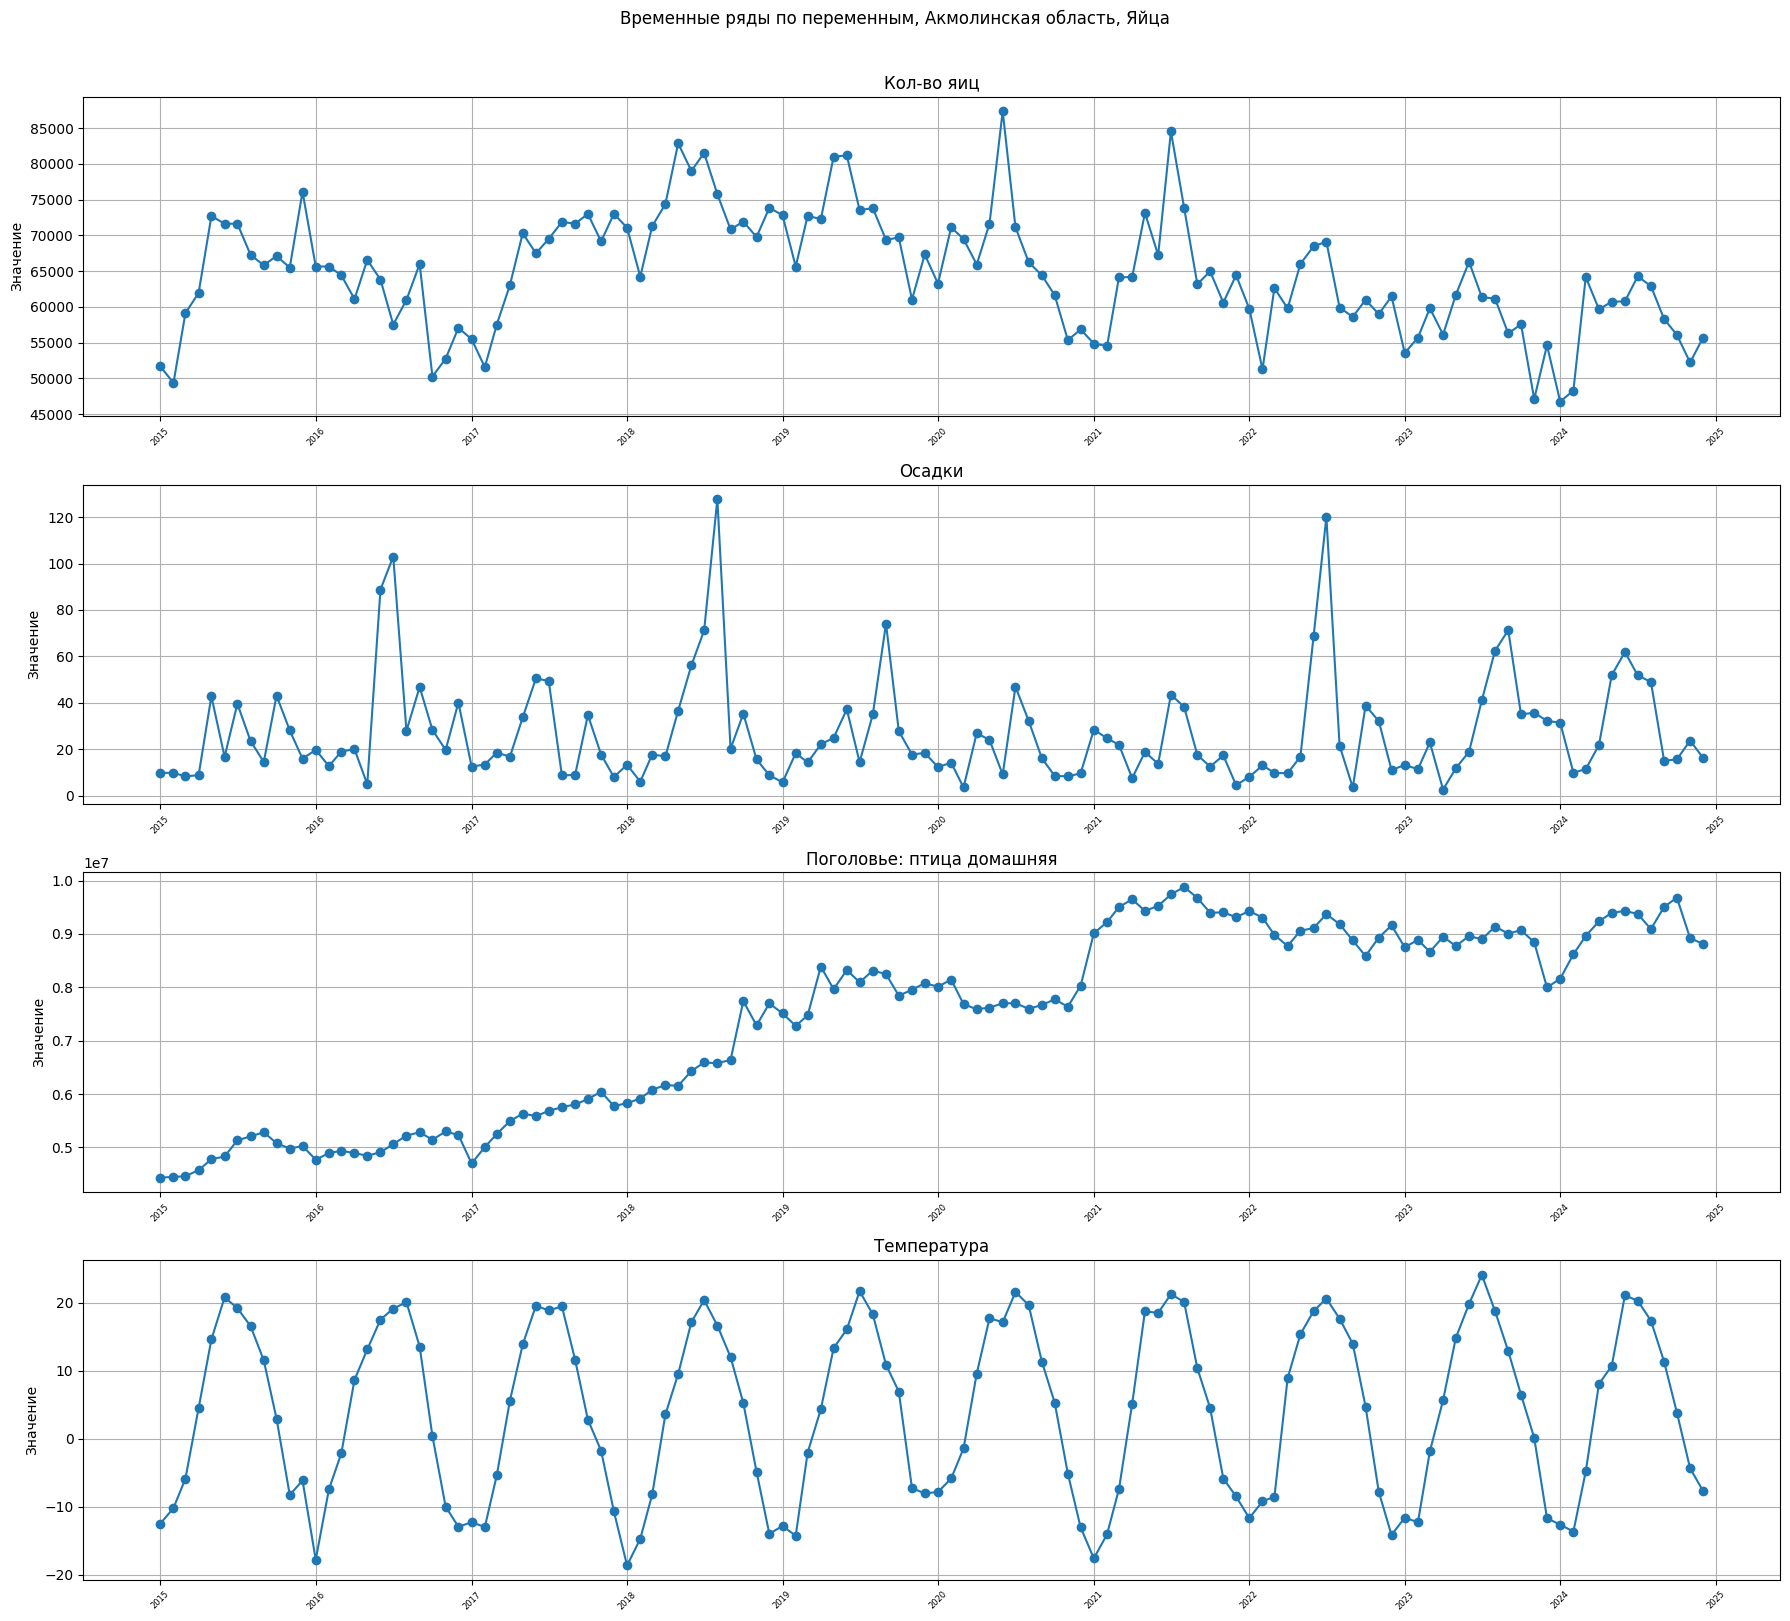

In [30]:
# Plot each variable in its own subplot
value_cols = [col for col in df_akmola.columns if col not in ["–ü–µ—Ä–∏–æ–¥"]]

n = len(value_cols)
plt.figure(figsize=(18, 4 * n))

for i, col in enumerate(value_cols, 1):
    plt.subplot(n, 1, i)
    plt.plot(df_akmola["–ü–µ—Ä–∏–æ–¥"], df_akmola[col], marker="o")
    plt.title(f"{col}")
    plt.grid(True)
    plt.ylabel("–ó–Ω–∞—á–µ–Ω–∏–µ")
    plt.xticks(rotation=45, fontsize = 6)

plt.suptitle("–í—Ä–µ–º–µ–Ω–Ω—ã–µ —Ä—è–¥—ã –ø–æ –ø–µ—Ä–µ–º–µ–Ω–Ω—ã–º, –ê–∫–º–æ–ª–∏–Ω—Å–∫–∞—è –æ–±–ª–∞—Å—Ç—å, –Ø–π—Ü–∞", y=1.01)
plt.tight_layout()
plt.show()

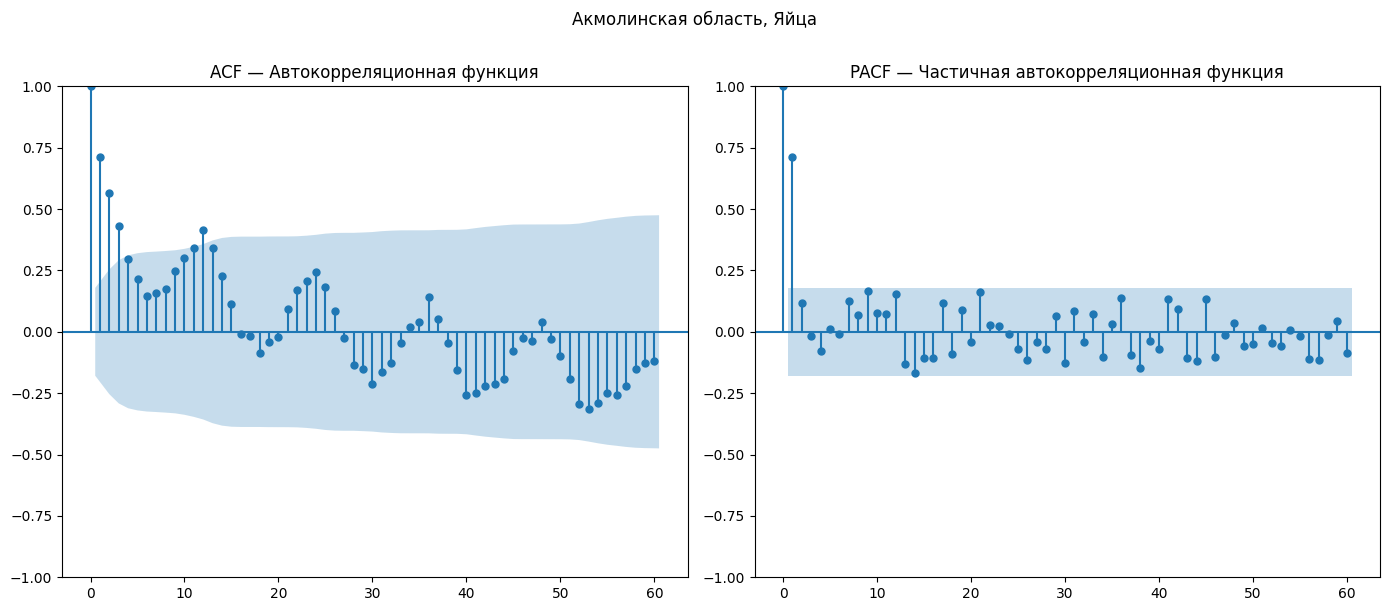

In [31]:
y = df_akmola["–ö–æ–ª-–≤–æ —è–∏—Ü"].sort_index()

# Plot ACF and PACF
plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
plot_acf(y, lags=60, ax=plt.gca(), title="ACF ‚Äî –ê–≤—Ç–æ–∫–æ—Ä—Ä–µ–ª—è—Ü–∏–æ–Ω–Ω–∞—è —Ñ—É–Ω–∫—Ü–∏—è")

plt.subplot(1, 2, 2)
plot_pacf(y, lags=60, ax=plt.gca(), title="PACF ‚Äî –ß–∞—Å—Ç–∏—á–Ω–∞—è –∞–≤—Ç–æ–∫–æ—Ä—Ä–µ–ª—è—Ü–∏–æ–Ω–Ω–∞—è —Ñ—É–Ω–∫—Ü–∏—è", method="ywm")
plt.suptitle("–ê–∫–º–æ–ª–∏–Ω—Å–∫–∞—è –æ–±–ª–∞—Å—Ç—å, –Ø–π—Ü–∞", y=1.01)

plt.tight_layout()
plt.show()

–ì—Ä–∞—Ñ–∏–∫–∏ –∞–≤—Ç–æ–∫–æ—Ä—Ä–µ–ª—è—Ü–∏–æ–Ω–Ω–æ–π –∏ —á–∞—Å—Ç–∏—á–Ω–æ–π –∞–≤—Ç–æ–∫–æ—Ä—Ä–µ–ª—è—Ü–∏–æ–Ω–Ω–æ–π —Ñ—É–Ω–∫—Ü–∏–π —É–∫–∞–∑—ã–≤–∞—é—Ç –Ω–∞ **—Å–∏–ª—å–Ω—É—é –≤–∑–∞–∏–º–æ—Å–≤—è–∑—å –ø–æ–∫–∞–∑–∞—Ç–µ–ª–µ–π —Ç–µ–∫—É—â–µ–≥–æ –º–µ—Å—è—Ü–∞ —Å–æ –∑–Ω–∞—á–µ–Ω–∏—è–º–∏ —Å–ª–µ–¥—É—é—â–∏—Ö 3 –º–µ—Å—è—Ü–µ–≤** –∏ –Ω–∞ –≤–æ–∑–º–æ–∂–Ω—É—é **–≥–æ–¥–æ–≤—É—é —Å–µ–∑–æ–Ω–Ω–æ—Å—Ç—å** (–ø–∏–∫ –Ω–∞ +12 –º–µ—Å—è—Ü–µ–≤). 

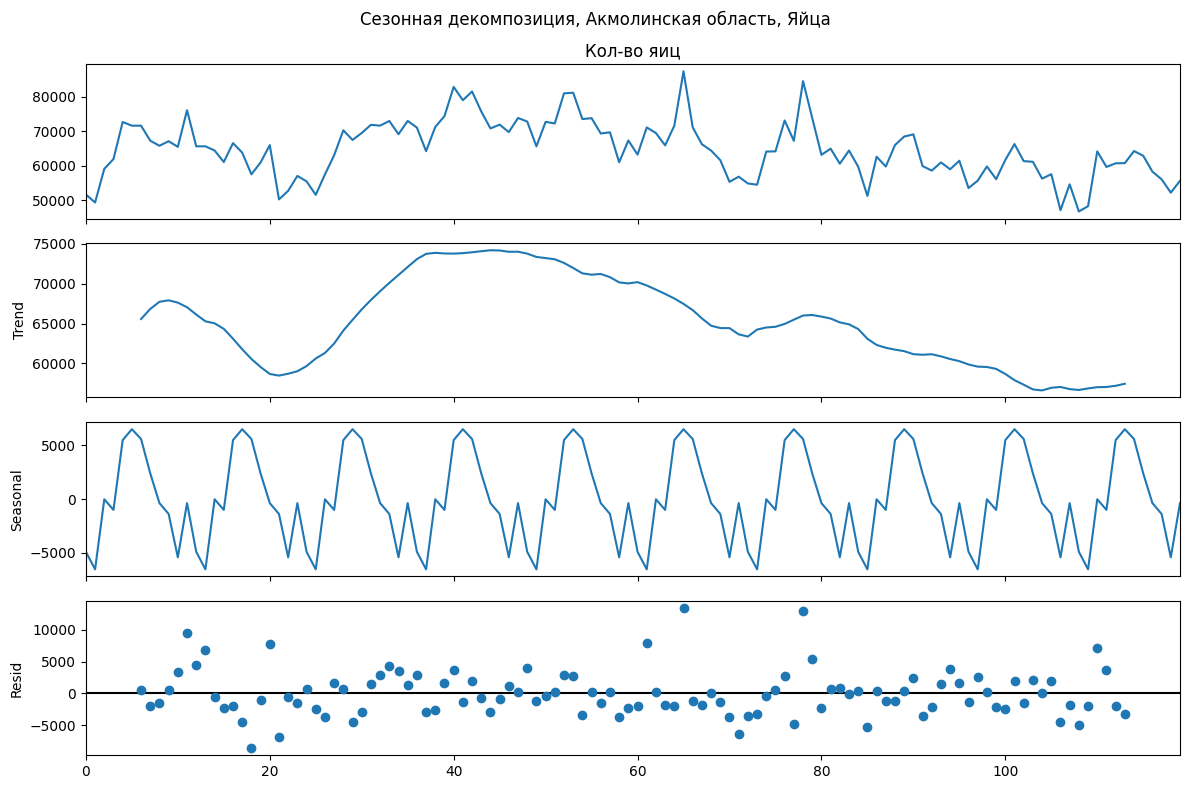

In [32]:
# Perform decomposition (period=12 for monthly data)
decomposition = seasonal_decompose(df_akmola["–ö–æ–ª-–≤–æ —è–∏—Ü"], model="additive", period=12)

# Plot with larger figure size
fig = decomposition.plot()
fig.set_size_inches(12, 8)
plt.suptitle("–°–µ–∑–æ–Ω–Ω–∞—è –¥–µ–∫–æ–º–ø–æ–∑–∏—Ü–∏—è, –ê–∫–º–æ–ª–∏–Ω—Å–∫–∞—è –æ–±–ª–∞—Å—Ç—å, –Ø–π—Ü–∞", fontsize=12)
plt.tight_layout()
plt.show()


In [33]:
# Run ADF test
result = adfuller(df_akmola["–ö–æ–ª-–≤–æ —è–∏—Ü"])

# Display results
print("üìä Augmented Dickey-Fuller Test Results:")
print(f"ADF Statistic: {result[0]:.4f}")
print(f"p-value: {result[1]:.4f}")
for key, value in result[4].items():
    print(f"Critical Value ({key}): {value:.4f}")

# Interpretation
if result[1] < 0.05:
    print("‚úÖ The series is likely **stationary** (reject H‚ÇÄ).")
else:
    print("‚ùå The series is likely **non-stationary** (fail to reject H‚ÇÄ).")


üìä Augmented Dickey-Fuller Test Results:
ADF Statistic: -3.6259
p-value: 0.0053
Critical Value (1%): -3.4870
Critical Value (5%): -2.8864
Critical Value (10%): -2.5800
‚úÖ The series is likely **stationary** (reject H‚ÇÄ).


–†–µ–∑—É–ª—å—Ç–∞—Ç—ã —Ç–µ—Å—Ç–∞ ADF —É–∫–∞–∑—ã–≤–∞—é—Ç –Ω–∞ **–Ω–µ—Å—Ç–∞—Ü–∏–æ–Ω–∞—Ä–Ω–æ—Å—Ç—å** –≤—Ä–µ–º–µ–Ω–Ω–æ–≥–æ —Ä—è–¥–∞.

In [34]:
df_akmola

–ü–µ—Ä–∏–æ–¥  –ö–æ–ª-–≤–æ —è–∏—Ü  –û—Å–∞–¥–∫–∏  –ü–æ–≥–æ–ª–æ–≤—å–µ: –ø—Ç–∏—Ü–∞ –¥–æ–º–∞—à–Ω—è—è  –¢–µ–º–ø–µ—Ä–∞—Ç—É—Ä–∞
0   2015-01-01     51667.7     9.8                  4436655.0   -12.490323
1   2015-02-01     49357.2     9.8                  4446764.0   -10.192857
2   2015-03-01     59105.8     8.3                  4461524.0    -5.870968
3   2015-04-01     61953.7     8.8                  4575245.0     4.490000
4   2015-05-01     72700.2    42.8                  4778690.0    14.574194
..         ...         ...     ...                        ...          ...
115 2024-08-01     62899.9    49.0                  9092081.0    17.338710
116 2024-09-01     58300.1    15.0                  9507343.0    11.300000
117 2024-10-01     56071.5    15.6                  9680147.0     3.832258
118 2024-11-01     52213.7    23.7                  8922229.0    -4.343333
119 2024-12-01     55640.3    16.4                  8815224.0    -7.638710

[120 rows x 5 columns]

In [35]:
# –°–æ–∑–¥–∞–Ω–∏–µ –ª–∞–≥–æ–≤ t-1 –¥–æ t-6 –¥–ª—è –ø–µ—Ä–µ–º–µ–Ω–Ω—ã—Ö
for lag in range(1, 7):
    df_akmola[f"–Ø–π—Ü–∞_t-{lag}"] = df_akmola["–ö–æ–ª-–≤–æ —è–∏—Ü"].shift(lag)
    df_akmola[f"–¢–µ–º–ø–µ—Ä–∞—Ç—É—Ä–∞_t-{lag}"] = df_akmola["–¢–µ–º–ø–µ—Ä–∞—Ç—É—Ä–∞"].shift(lag)
    df_akmola[f"–û—Å–∞–¥–∫–∏_t-{lag}"] = df_akmola["–û—Å–∞–¥–∫–∏"].shift(lag)
    df_akmola[f"–ü–æ–≥–æ–ª–æ–≤—å–µ: –ø—Ç–∏—Ü–∞ –¥–æ–º–∞—à–Ω—è—è_t-{lag}"] = df_akmola["–ü–æ–≥–æ–ª–æ–≤—å–µ: –ø—Ç–∏—Ü–∞ –¥–æ–º–∞—à–Ω—è—è"].shift(lag)

df_akmola_full = df_akmola[["–ü–µ—Ä–∏–æ–¥", "–ö–æ–ª-–≤–æ —è–∏—Ü", 
                            "–Ø–π—Ü–∞_t-1", "–Ø–π—Ü–∞_t-2", "–Ø–π—Ü–∞_t-3", "–Ø–π—Ü–∞_t-4", "–Ø–π—Ü–∞_t-5", "–Ø–π—Ü–∞_t-6",
                            "–¢–µ–º–ø–µ—Ä–∞—Ç—É—Ä–∞", "–¢–µ–º–ø–µ—Ä–∞—Ç—É—Ä–∞_t-1", "–¢–µ–º–ø–µ—Ä–∞—Ç—É—Ä–∞_t-2", "–¢–µ–º–ø–µ—Ä–∞—Ç—É—Ä–∞_t-3", "–¢–µ–º–ø–µ—Ä–∞—Ç—É—Ä–∞_t-4", "–¢–µ–º–ø–µ—Ä–∞—Ç—É—Ä–∞_t-5", "–¢–µ–º–ø–µ—Ä–∞—Ç—É—Ä–∞_t-6",
                            "–û—Å–∞–¥–∫–∏", "–û—Å–∞–¥–∫–∏_t-1", "–û—Å–∞–¥–∫–∏_t-2", "–û—Å–∞–¥–∫–∏_t-3", "–û—Å–∞–¥–∫–∏_t-4", "–û—Å–∞–¥–∫–∏_t-5", "–û—Å–∞–¥–∫–∏_t-6",
                            "–ü–æ–≥–æ–ª–æ–≤—å–µ: –ø—Ç–∏—Ü–∞ –¥–æ–º–∞—à–Ω—è—è", "–ü–æ–≥–æ–ª–æ–≤—å–µ: –ø—Ç–∏—Ü–∞ –¥–æ–º–∞—à–Ω—è—è_t-1", "–ü–æ–≥–æ–ª–æ–≤—å–µ: –ø—Ç–∏—Ü–∞ –¥–æ–º–∞—à–Ω—è—è_t-2", "–ü–æ–≥–æ–ª–æ–≤—å–µ: –ø—Ç–∏—Ü–∞ –¥–æ–º–∞—à–Ω—è—è_t-3", "–ü–æ–≥–æ–ª–æ–≤—å–µ: –ø—Ç–∏—Ü–∞ –¥–æ–º–∞—à–Ω—è—è_t-4", "–ü–æ–≥–æ–ª–æ–≤—å–µ: –ø—Ç–∏—Ü–∞ –¥–æ–º–∞—à–Ω—è—è_t-5", "–ü–æ–≥–æ–ª–æ–≤—å–µ: –ø—Ç–∏—Ü–∞ –¥–æ–º–∞—à–Ω—è—è_t-6"]]
df_akmola_full

–ü–µ—Ä–∏–æ–¥  –ö–æ–ª-–≤–æ —è–∏—Ü  –Ø–π—Ü–∞_t-1  –Ø–π—Ü–∞_t-2  –Ø–π—Ü–∞_t-3  –Ø–π—Ü–∞_t-4  –Ø–π—Ü–∞_t-5  \
0   2015-01-01     51667.7       NaN       NaN       NaN       NaN       NaN   
1   2015-02-01     49357.2   51667.7       NaN       NaN       NaN       NaN   
2   2015-03-01     59105.8   49357.2   51667.7       NaN       NaN       NaN   
3   2015-04-01     61953.7   59105.8   49357.2   51667.7       NaN       NaN   
4   2015-05-01     72700.2   61953.7   59105.8   49357.2   51667.7       NaN   
..         ...         ...       ...       ...       ...       ...       ...   
115 2024-08-01     62899.9   64270.3   60767.6   60711.6   59663.6   64167.2   
116 2024-09-01     58300.1   62899.9   64270.3   60767.6   60711.6   59663.6   
117 2024-10-01     56071.5   58300.1   62899.9   64270.3   60767.6   60711.6   
118 2024-11-01     52213.7   56071.5   58300.1   62899.9   64270.3   60767.6   
119 2024-12-01     55640.3   52213.7   56071.5   58300.1   62899.9   64270.3   

     –Ø–π—Ü–∞_t-6  –¢–µ–º–ø–µ—Ä–∞—Ç—É—Ä–∞  –¢–µ–º–ø–µ—Ä–∞—Ç—É—Ä–∞_t-1  –¢–µ–º–ø–µ—Ä–∞—Ç—É—Ä–∞_t-2  –¢–µ–º–ø–µ—Ä–∞—Ç—É—Ä–∞_t-3  \
0         NaN   -12.490323              NaN              NaN              NaN   
1         NaN   -10.192857       -12.490323              NaN              NaN   
2         NaN    -5.870968       -10.192857       -12.490323              NaN   
3         NaN     4.490000        -5.870968       -10.192857       -12.490323   
4         NaN    14.574194         4.490000        -5.870968       -10.192857   
..        ...          ...              ...              ...              ...   
115   48287.8    17.338710        20.270968        21.043333        10.696774   
116   64167.2    11.300000        17.338710        20.270968        21.043333   
117   59663.6     3.832258        11.300000        17.338710        20.270968   
118   60711.6    -4.343333         3.832258        11.300000        17.338710   
119   60767.6    -7.638710        -4.343333         3.832258        11.300000   

     –¢–µ–º–ø–µ—Ä–∞—Ç—É—Ä–∞_t-4  –¢–µ–º–ø–µ—Ä–∞—Ç—É—Ä–∞_t-5  –¢–µ–º–ø–µ—Ä–∞—Ç—É—Ä–∞_t-6  –û—Å–∞–¥–∫–∏  –û—Å–∞–¥–∫–∏_t-1  \
0                NaN              NaN              NaN     9.8         NaN   
1                NaN              NaN              NaN     9.8         9.8   
2                NaN              NaN              NaN     8.3         9.8   
3                NaN              NaN              NaN     8.8         8.3   
4         -12.490323              NaN              NaN    42.8         8.8   
..               ...              ...              ...     ...         ...   
115         8.026667        -4.809677       -13.644828    49.0        51.8   
116        10.696774         8.026667        -4.809677    15.0        49.0   
117        21.043333        10.696774         8.026667    15.6        15.0   
118        20.270968        21.043333        10.696774    23.7        15.6   
119        17.338710        20.270968        21.043333    16.4        23.7   

     –û—Å–∞–¥–∫–∏_t-2  –û—Å–∞–¥–∫–∏_t-3  –û—Å–∞–¥–∫–∏_t-4  –û—Å–∞–¥–∫–∏_t-5  –û—Å–∞–¥–∫–∏_t-6  \
0           NaN         NaN         NaN         NaN         NaN   
1           NaN         NaN         NaN         NaN         NaN   
2           9.8         NaN         NaN         NaN         NaN   
3           9.8         9.8         NaN         NaN         NaN   
4           8.3         9.8         9.8         NaN         NaN   
..          ...         ...         ...         ...         ...   
115        61.9        51.9        21.8        11.4         9.9   
116        51.8        61.9        51.9        21.8        11.4   
117        49.0        51.8        61.9        51.9        21.8   
118        15.0        49.0        51.8        61.9        51.9   
119        15.6        15.0        49.0        51.8        61.9   

     –ü–æ–≥–æ–ª–æ–≤—å–µ: –ø—Ç–∏—Ü–∞ –¥–æ–º–∞—à–Ω—è—è  –ü–æ–≥–æ–ª–æ–≤—å–µ: –ø—Ç–∏—Ü–∞ –¥–æ–º–∞—à–Ω—è—è_t-1  \
0                    4436655.0                            NaN   
1

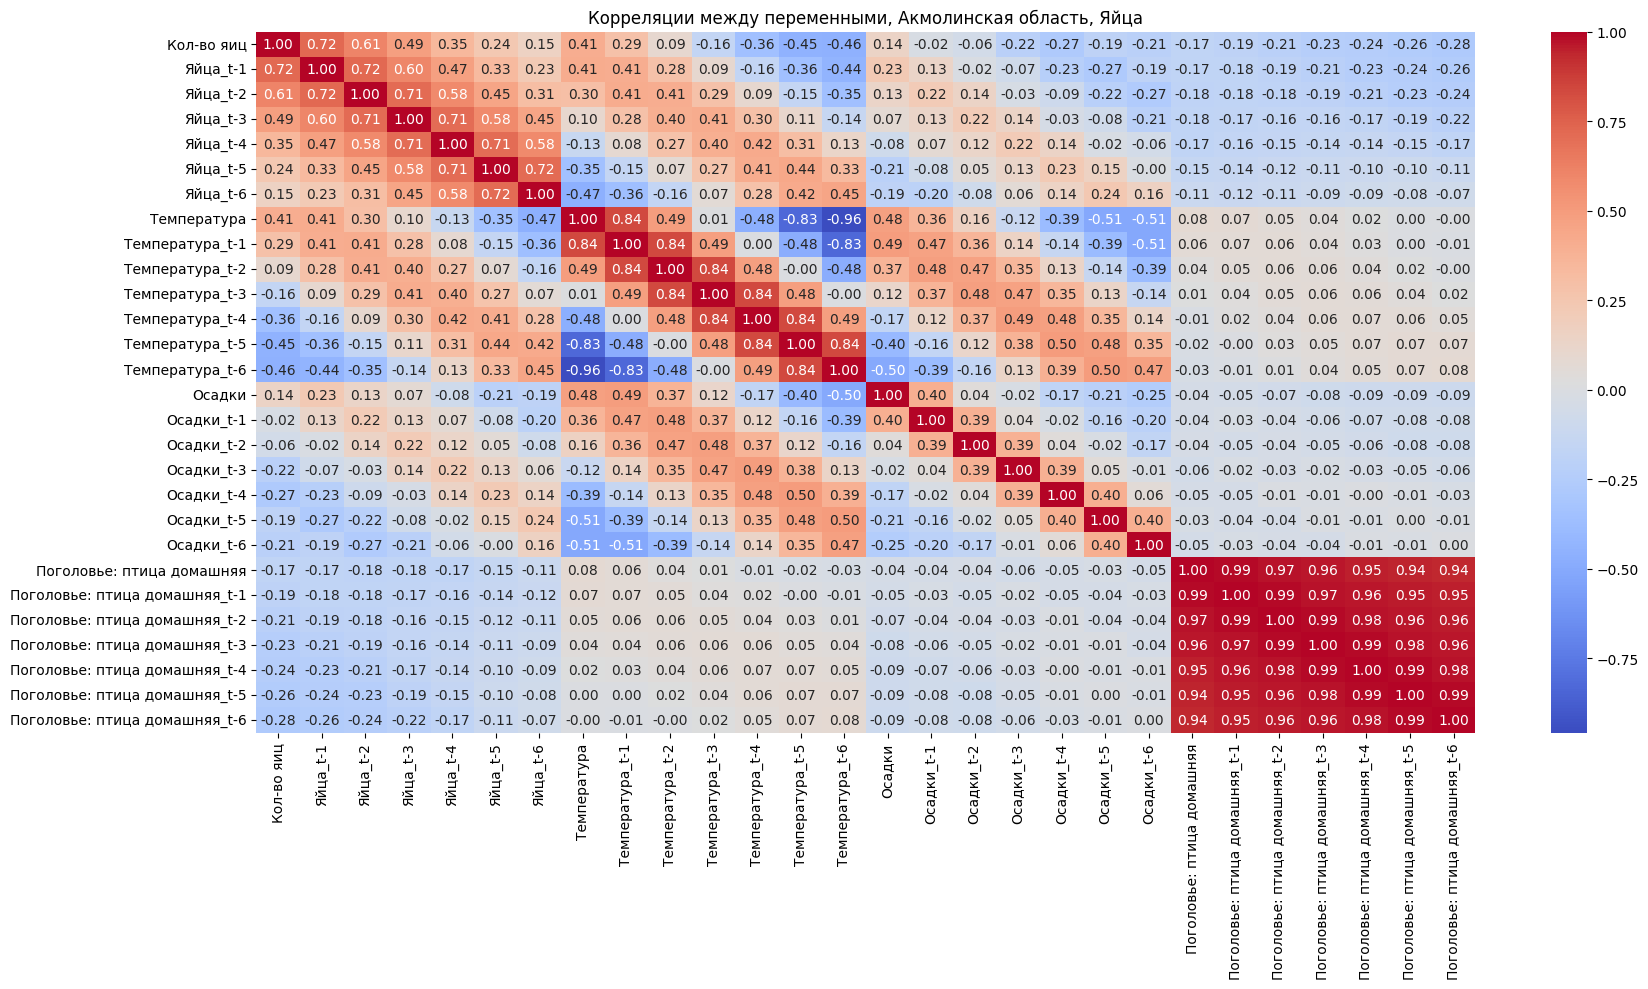

In [36]:
df_corr = df_akmola_full[[col for col in df_akmola_full.columns if col not in ["–ü–µ—Ä–∏–æ–¥"]]].dropna().copy()

# 1. Correlation matrix
corr_matrix = df_corr.corr()

# 2. Plot heatmap
plt.figure(figsize=(18, 10))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("–ö–æ—Ä—Ä–µ–ª—è—Ü–∏–∏ –º–µ–∂–¥—É –ø–µ—Ä–µ–º–µ–Ω–Ω—ã–º–∏, –ê–∫–º–æ–ª–∏–Ω—Å–∫–∞—è –æ–±–ª–∞—Å—Ç—å, –Ø–π—Ü–∞")
plt.tight_layout()
plt.show()

*–í–´–í–û–î–´ –ü–û –ö–û–†–†–ï–õ–Ø–¶–ò–ò*

In [37]:
# Set your target variable
target_var = "–ö–æ–ª-–≤–æ —è–∏—Ü"

# Get correlations with the target variable
target_corr = corr_matrix[target_var].drop(target_var)  # exclude self-correlation

# Keep only features with |correlation| >= 0.5
selected_vars = target_corr[abs(target_corr) >= 0.45].index.tolist()

print("‚úÖ –û—Ç–æ–±—Ä–∞–Ω–Ω—ã–µ –ø–µ—Ä–µ–º–µ–Ω–Ω—ã–µ —Å –∫–æ—Ä—Ä–µ–ª—è—Ü–∏–µ–π >= 0.5:")
print(selected_vars)

# Optionally: create new dataframe with selected variables + target
df_selected = df_akmola_full[['–ü–µ—Ä–∏–æ–¥'] + selected_vars + [target_var]]
df_selected

‚úÖ –û—Ç–æ–±—Ä–∞–Ω–Ω—ã–µ –ø–µ—Ä–µ–º–µ–Ω–Ω—ã–µ —Å –∫–æ—Ä—Ä–µ–ª—è—Ü–∏–µ–π >= 0.5:
['–Ø–π—Ü–∞_t-1', '–Ø–π—Ü–∞_t-2', '–Ø–π—Ü–∞_t-3', '–¢–µ–º–ø–µ—Ä–∞—Ç—É—Ä–∞_t-6']


–ü–µ—Ä–∏–æ–¥  –Ø–π—Ü–∞_t-1  –Ø–π—Ü–∞_t-2  –Ø–π—Ü–∞_t-3  –¢–µ–º–ø–µ—Ä–∞—Ç—É—Ä–∞_t-6  –ö–æ–ª-–≤–æ —è–∏—Ü
0   2015-01-01       NaN       NaN       NaN              NaN     51667.7
1   2015-02-01   51667.7       NaN       NaN              NaN     49357.2
2   2015-03-01   49357.2   51667.7       NaN              NaN     59105.8
3   2015-04-01   59105.8   49357.2   51667.7              NaN     61953.7
4   2015-05-01   61953.7   59105.8   49357.2              NaN     72700.2
..         ...       ...       ...       ...              ...         ...
115 2024-08-01   64270.3   60767.6   60711.6       -13.644828     62899.9
116 2024-09-01   62899.9   64270.3   60767.6        -4.809677     58300.1
117 2024-10-01   58300.1   62899.9   64270.3         8.026667     56071.5
118 2024-11-01   56071.5   58300.1   62899.9        10.696774     52213.7
119 2024-12-01   52213.7   56071.5   58300.1        21.043333     55640.3

[120 rows x 6 columns]

In [38]:
df_vif = df_selected[[col for col in df_selected.columns if col not in ["–ü–µ—Ä–∏–æ–¥"]]].dropna().copy()

X_vif = add_constant(df_vif[[i for i in df_vif.columns if i != "–ö–æ–ª-–≤–æ —è–∏—Ü"]])

vif_data = pd.DataFrame({
    "Variable": X_vif.columns,
    "VIF": [variance_inflation_factor(X_vif.values, i) for i in range(X_vif.shape[1])]
})
vif_data.sort_values('VIF')

Variable         VIF
4  –¢–µ–º–ø–µ—Ä–∞—Ç—É—Ä–∞_t-6    1.324814
3         –Ø–π—Ü–∞_t-3    2.204717
1         –Ø–π—Ü–∞_t-1    2.409284
2         –Ø–π—Ü–∞_t-2    2.869595
0            const  101.403204

Step-by-Step Strategy to Handle High VIFs:

Sort VIFs in descending order
Drop variables one at a time, starting with the one that has the highest VIF.

Check domain relevance
Keep variables that are theoretically important or core to your hypothesis, even if VIF is high.

Evaluate correlation matrix
If two variables have high correlation with each other, and both have high VIFs, drop the one less correlated with the target.

Recalculate VIF after each drop
After dropping one variable, recalculate all VIFs. Sometimes removing just one variable significantly reduces others.

Use stepwise selection (optional)
Automated methods like backward elimination can help drop redundant predictors based on model fit and VIF thresholds.

In [39]:
df_selected = df_selected.drop(columns = ['–Ø–π—Ü–∞_t-3', '–Ø–π—Ü–∞_t-2'])
df_selected

–ü–µ—Ä–∏–æ–¥  –Ø–π—Ü–∞_t-1  –¢–µ–º–ø–µ—Ä–∞—Ç—É—Ä–∞_t-6  –ö–æ–ª-–≤–æ —è–∏—Ü
0   2015-01-01       NaN              NaN     51667.7
1   2015-02-01   51667.7              NaN     49357.2
2   2015-03-01   49357.2              NaN     59105.8
3   2015-04-01   59105.8              NaN     61953.7
4   2015-05-01   61953.7              NaN     72700.2
..         ...       ...              ...         ...
115 2024-08-01   64270.3       -13.644828     62899.9
116 2024-09-01   62899.9        -4.809677     58300.1
117 2024-10-01   58300.1         8.026667     56071.5
118 2024-11-01   56071.5        10.696774     52213.7
119 2024-12-01   52213.7        21.043333     55640.3

[120 rows x 4 columns]

In [40]:
df_vif = df_selected[[col for col in df_selected.columns if col not in ["–ü–µ—Ä–∏–æ–¥"]]].dropna().copy()
X_vif = add_constant(df_vif[[i for i in df_vif.columns if i != "–ö–æ–ª-–≤–æ —è–∏—Ü"]])

vif_data = pd.DataFrame({
    "Variable": X_vif.columns,
    "VIF": [variance_inflation_factor(X_vif.values, i) for i in range(X_vif.shape[1])]
})
vif_data.sort_values('VIF')

Variable        VIF
1         –Ø–π—Ü–∞_t-1   1.245277
2  –¢–µ–º–ø–µ—Ä–∞—Ç—É—Ä–∞_t-6   1.245277
0            const  84.797862

In [41]:
df_selected = df_selected.dropna().copy()
df_selected

–ü–µ—Ä–∏–æ–¥  –Ø–π—Ü–∞_t-1  –¢–µ–º–ø–µ—Ä–∞—Ç—É—Ä–∞_t-6  –ö–æ–ª-–≤–æ —è–∏—Ü
6   2015-07-01   71629.5       -12.490323     71629.5
7   2015-08-01   71629.5       -10.192857     67269.6
8   2015-09-01   67269.6        -5.870968     65812.8
9   2015-10-01   65812.8         4.490000     67117.6
10  2015-11-01   67117.6        14.574194     65494.2
..         ...       ...              ...         ...
115 2024-08-01   64270.3       -13.644828     62899.9
116 2024-09-01   62899.9        -4.809677     58300.1
117 2024-10-01   58300.1         8.026667     56071.5
118 2024-11-01   56071.5        10.696774     52213.7
119 2024-12-01   52213.7        21.043333     55640.3

[114 rows x 4 columns]

### Models

#### –ú–Ω–æ–≥–æ—Ñ–∞–∫—Ç–æ—Ä–Ω–∞—è —Ä–µ–≥—Ä–µ—Å—Å–∏—è

In [42]:
# def forward_selection(data, target, candidate_features, criterion="adj_r2"):
#     remaining = list(candidate_features)
#     selected = []
#     best_score = -float("inf")
#     best_model = None

#     while remaining:
#         scores_with_candidates = []
#         for candidate in remaining:
#             features = selected + [candidate]
#             X = sm.add_constant(data[features])
#             y = data[target]
#             model = sm.OLS(y, X).fit()

#             if criterion == "adj_r2":
#                 score = model.rsquared_adj
#             elif criterion == "aic":
#                 score = -model.aic  # negative for maximizing
#             else:
#                 raise ValueError("criterion must be 'adj_r2' or 'aic'")

#             scores_with_candidates.append((score, candidate, model))

#         scores_with_candidates.sort(reverse=True)
#         best_new_score, best_candidate, model = scores_with_candidates[0]

#         if best_new_score > best_score:
#             remaining.remove(best_candidate)
#             selected.append(best_candidate)
#             best_score = best_new_score
#             best_model = model
#             print(f"‚úÖ Added: {best_candidate}, {criterion.upper()}: {best_score:.4f}")
#         else:
#             print("‚õî No improvement. Stopping.")
#             break

#     return selected, best_model


In [43]:
# Define target and features
y = df_selected["–ö–æ–ª-–≤–æ —è–∏—Ü"]
X = df_selected.drop(columns=["–ü–µ—Ä–∏–æ–¥", "–ö–æ–ª-–≤–æ —è–∏—Ü"])

# Add constant term
X = sm.add_constant(X)

# Fit the model
model = sm.OLS(y, X).fit()

# Show summary
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:             –ö–æ–ª-–≤–æ —è–∏—Ü   R-squared:                       0.546
Model:                            OLS   Adj. R-squared:                  0.538
Method:                 Least Squares   F-statistic:                     66.81
Date:                Thu, 24 Apr 2025   Prob (F-statistic):           8.99e-20
Time:                        20:35:42   Log-Likelihood:                -1142.5
No. Observations:                 114   AIC:                             2291.
Df Residuals:                     111   BIC:                             2299.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const            2.322e+04   4763.

In [44]:
df_selected

–ü–µ—Ä–∏–æ–¥  –Ø–π—Ü–∞_t-1  –¢–µ–º–ø–µ—Ä–∞—Ç—É—Ä–∞_t-6  –ö–æ–ª-–≤–æ —è–∏—Ü
6   2015-07-01   71629.5       -12.490323     71629.5
7   2015-08-01   71629.5       -10.192857     67269.6
8   2015-09-01   67269.6        -5.870968     65812.8
9   2015-10-01   65812.8         4.490000     67117.6
10  2015-11-01   67117.6        14.574194     65494.2
..         ...       ...              ...         ...
115 2024-08-01   64270.3       -13.644828     62899.9
116 2024-09-01   62899.9        -4.809677     58300.1
117 2024-10-01   58300.1         8.026667     56071.5
118 2024-11-01   56071.5        10.696774     52213.7
119 2024-12-01   52213.7        21.043333     55640.3

[114 rows x 4 columns]

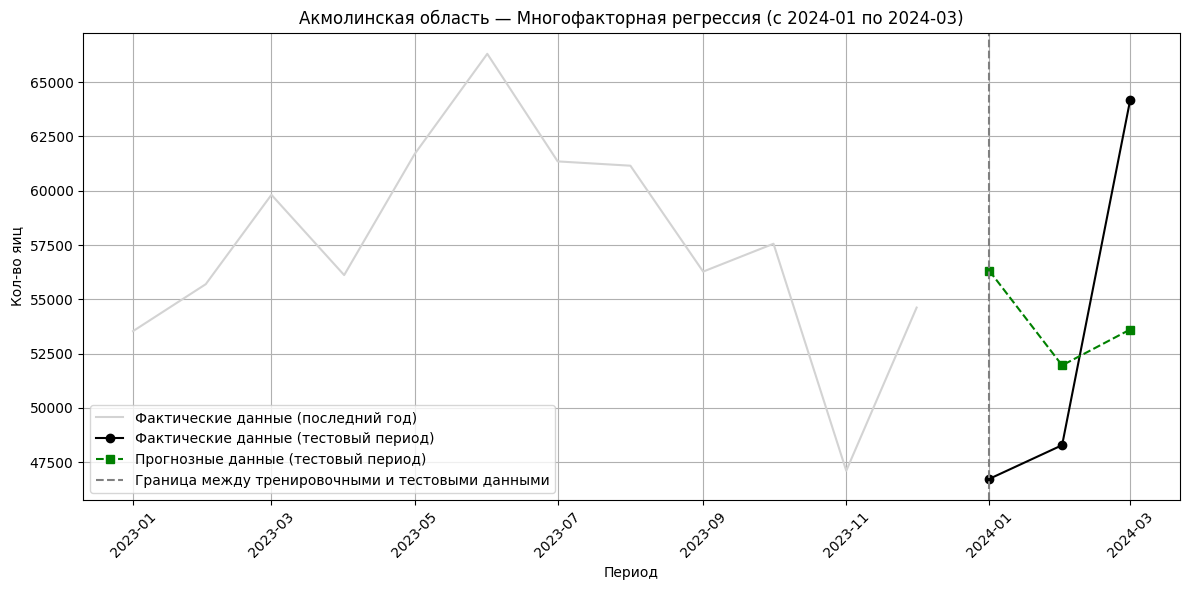

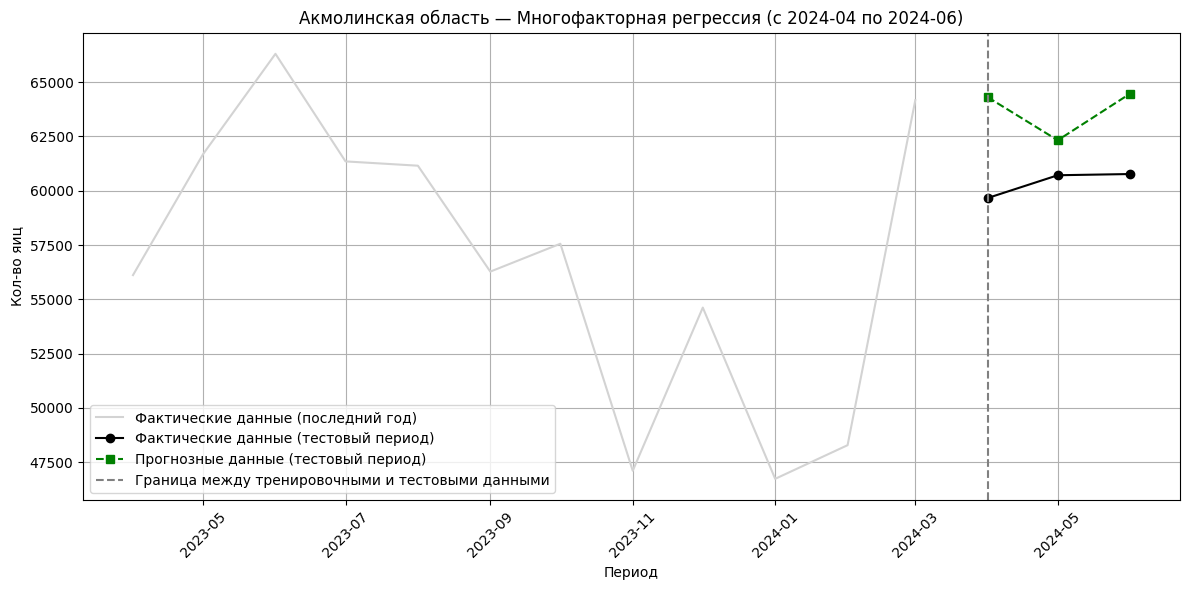

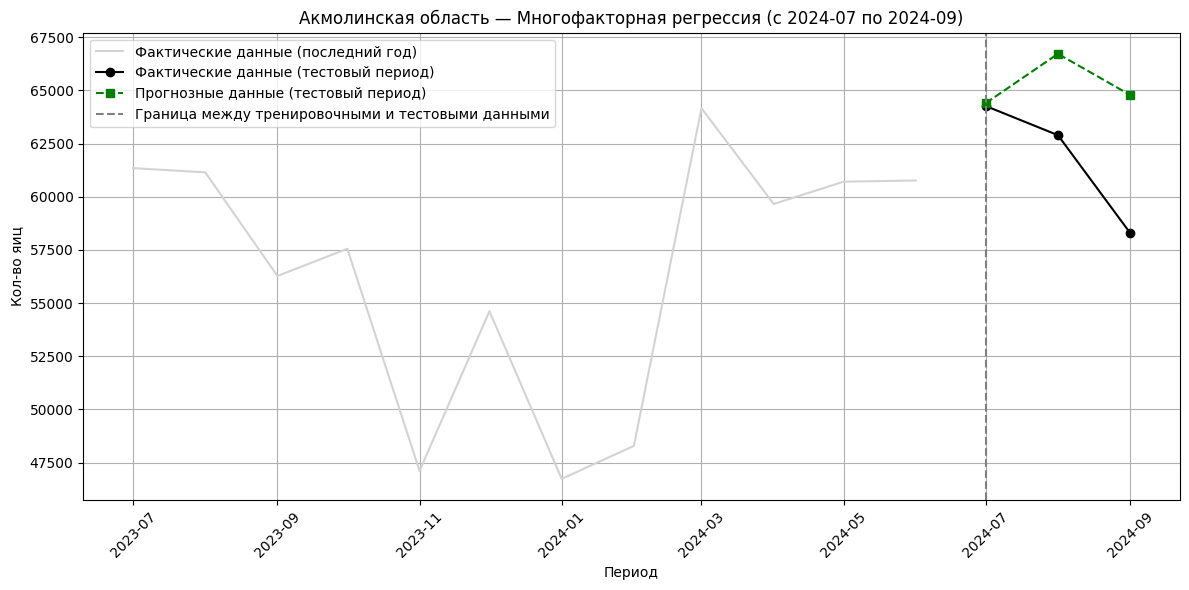

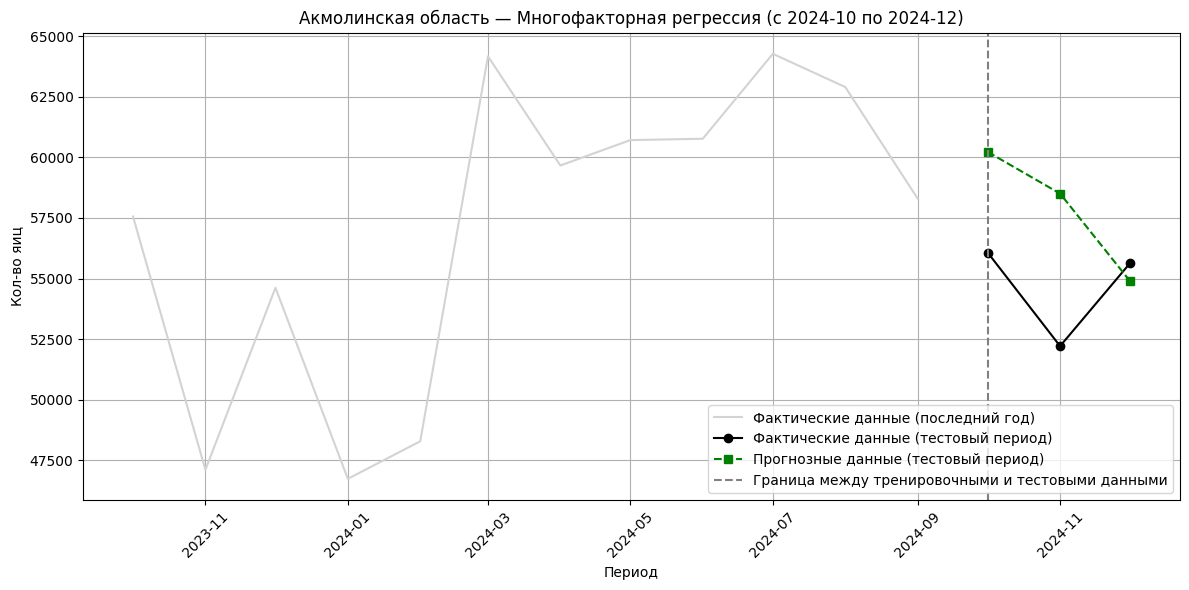

In [45]:
df = df_selected.sort_values("–ü–µ—Ä–∏–æ–¥").copy()

target = "–ö–æ–ª-–≤–æ —è–∏—Ü"
features = [col for col in df_selected.columns if col not in ['–ü–µ—Ä–∏–æ–¥', '–ö–æ–ª-–≤–æ —è–∏—Ü']]

results = []

# Define 4 rolling test sets for 2024
start_dates = ["2024-01", "2024-04", "2024-07", "2024-10"]

for start in start_dates:
    test_start = pd.to_datetime(start)
    test_end = test_start + pd.DateOffset(months=3) - pd.DateOffset(days=1)

    # Split data
    train_df = df[df["–ü–µ—Ä–∏–æ–¥"] < test_start]
    test_df = df[(df["–ü–µ—Ä–∏–æ–¥"] >= test_start) & (df["–ü–µ—Ä–∏–æ–¥"] <= test_end)]

    X_train = sm.add_constant(train_df[features])
    y_train = train_df[target]

    X_test = sm.add_constant(test_df[features])
    y_test = test_df[target]

    # Fit and predict
    model = sm.OLS(y_train, X_train).fit()
    y_pred = model.predict(X_test)

    # Metrics
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    mae = mean_absolute_error(y_test, y_pred)
    mape = (np.abs((y_test - y_pred) / y_test).mean()) * 100
    r2 = r2_score(y_test, y_pred)
    
    results.append({
        "Test period": f"{start} to {test_end.strftime('%Y-%m')}",
        "RMSE": rmse,
        "MAE": mae,
        "MAPE (%)": mape,
        # "R¬≤": r2
    })
    plt.figure(figsize=(12, 6))
    last_train_year = train_df[train_df["–ü–µ—Ä–∏–æ–¥"] >= (test_start - pd.DateOffset(months=12))]
    plt.plot(last_train_year["–ü–µ—Ä–∏–æ–¥"], last_train_year[target], color="lightgray", label="–§–∞–∫—Ç–∏—á–µ—Å–∫–∏–µ –¥–∞–Ω–Ω—ã–µ (–ø–æ—Å–ª–µ–¥–Ω–∏–π –≥–æ–¥)")

    plt.plot(test_df["–ü–µ—Ä–∏–æ–¥"], y_test.values, marker="o", color="black", label="–§–∞–∫—Ç–∏—á–µ—Å–∫–∏–µ –¥–∞–Ω–Ω—ã–µ (—Ç–µ—Å—Ç–æ–≤—ã–π –ø–µ—Ä–∏–æ–¥)")
    plt.plot(test_df["–ü–µ—Ä–∏–æ–¥"], y_pred.values, marker="s", linestyle="--", color="green", label="–ü—Ä–æ–≥–Ω–æ–∑–Ω—ã–µ –¥–∞–Ω–Ω—ã–µ (—Ç–µ—Å—Ç–æ–≤—ã–π –ø–µ—Ä–∏–æ–¥)")

    plt.axvline(test_start, color="gray", linestyle="--", label="–ì—Ä–∞–Ω–∏—Ü–∞ –º–µ–∂–¥—É —Ç—Ä–µ–Ω–∏—Ä–æ–≤–æ—á–Ω—ã–º–∏ –∏ —Ç–µ—Å—Ç–æ–≤—ã–º–∏ –¥–∞–Ω–Ω—ã–º–∏")
    plt.title(f"–ê–∫–º–æ–ª–∏–Ω—Å–∫–∞—è –æ–±–ª–∞—Å—Ç—å ‚Äî –ú–Ω–æ–≥–æ—Ñ–∞–∫—Ç–æ—Ä–Ω–∞—è —Ä–µ–≥—Ä–µ—Å—Å–∏—è (—Å {start} –ø–æ {test_end.strftime('%Y-%m')})")
    plt.xlabel("–ü–µ—Ä–∏–æ–¥")
    plt.ylabel("–ö–æ–ª-–≤–æ —è–∏—Ü")
    plt.legend()
    plt.grid(True)
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

In [46]:
# Convert to DataFrame
results_df = pd.DataFrame(results)
avg_row = results_df.mean(numeric_only=True).to_dict()
avg_row["Test period"] = "Average"
results_df = pd.concat([results_df, pd.DataFrame([avg_row])], ignore_index=True)

# Show results
print(results_df)

          Test period         RMSE          MAE   MAPE (%)
0  2024-01 to 2024-03  8495.985154  7933.831960  14.846043
1  2024-04 to 2024-06  3550.716842  3317.298204   5.506896
2  2024-07 to 2024-09  4349.766892  3482.068625   5.805748
3  2024-10 to 2024-12  4373.758893  3732.192194   6.935924
4             Average  5192.556945  4616.347746   8.273653


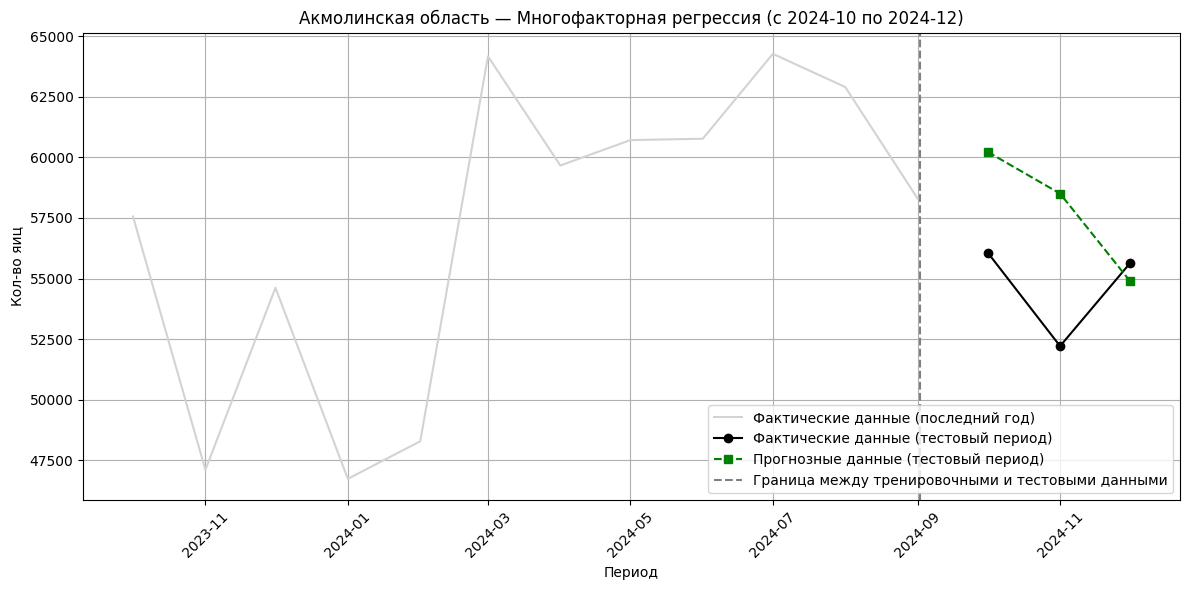

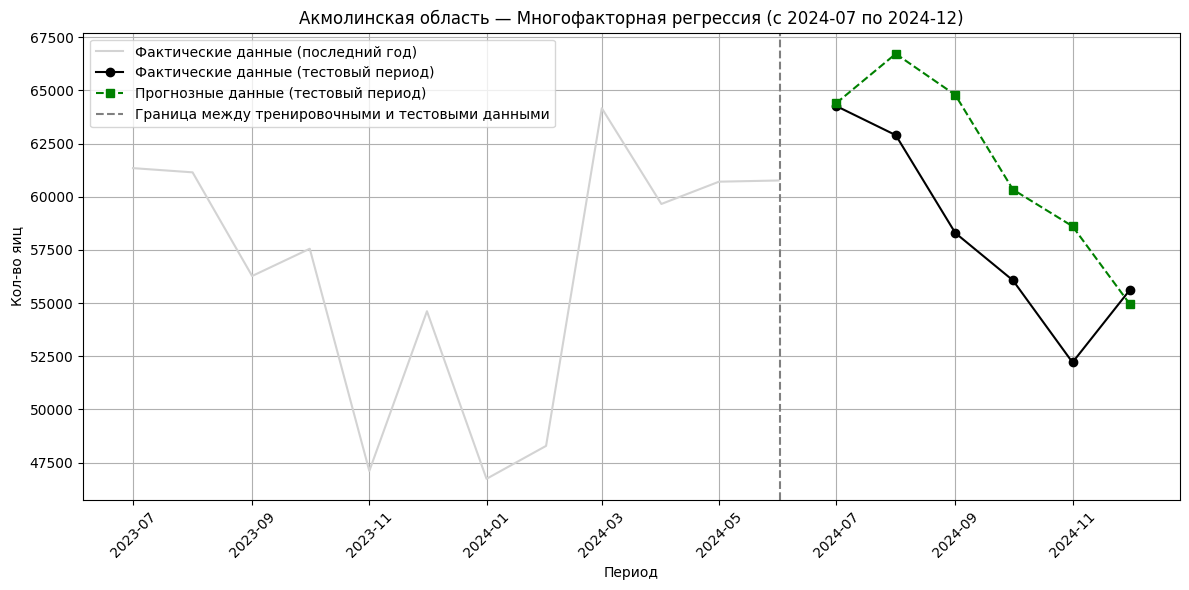

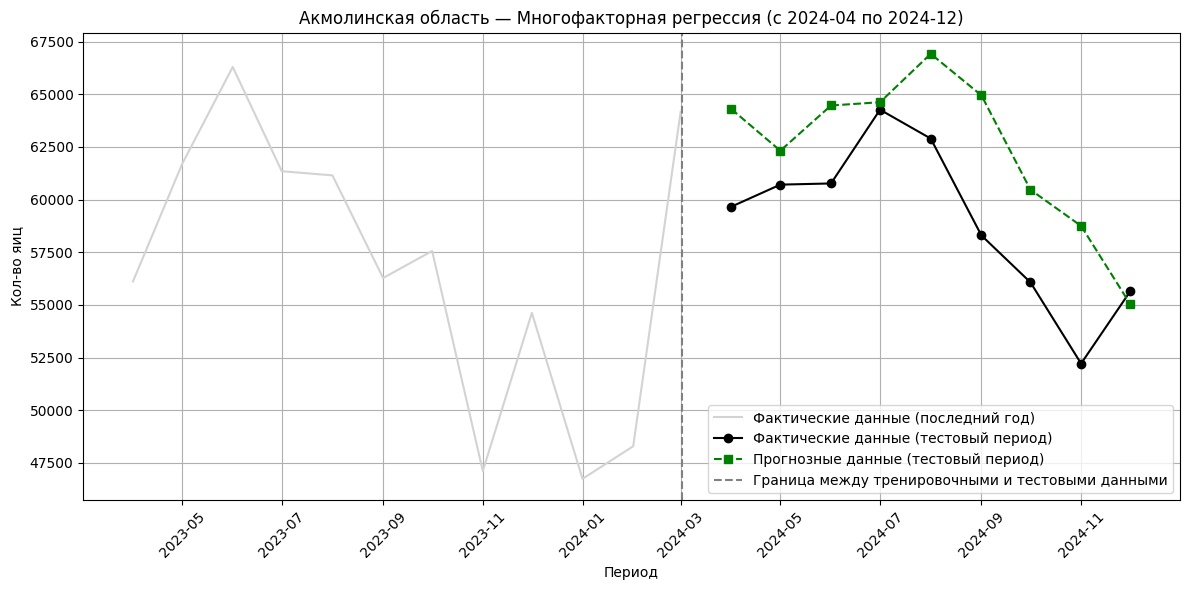

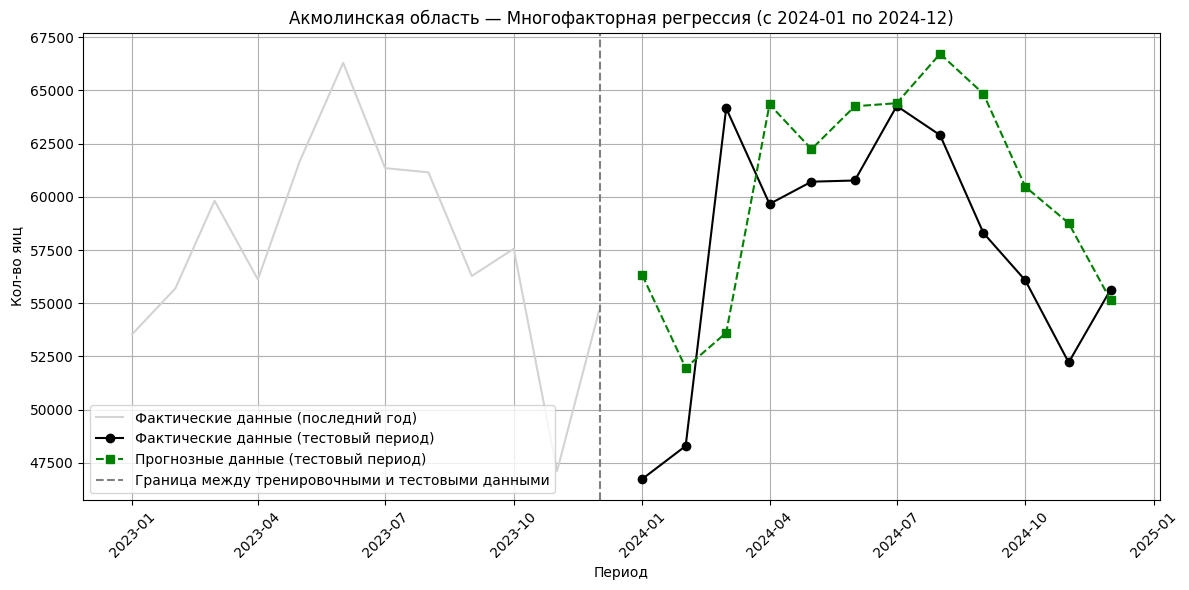

In [47]:
results = []

# Define 4 rolling test sets for 2024
horizons = [3, 6, 9, 12]

for horizon in horizons:

    test_end = pd.to_datetime("2024-12")
    test_start = test_end - pd.DateOffset(months=horizon) + pd.DateOffset(days=1)

    # Split data
    train_df = df[df["–ü–µ—Ä–∏–æ–¥"] < test_start]
    test_df = df[(df["–ü–µ—Ä–∏–æ–¥"] >= test_start) & (df["–ü–µ—Ä–∏–æ–¥"] <= test_end)]

    X_train = sm.add_constant(train_df[features])
    y_train = train_df[target]

    X_test = sm.add_constant(test_df[features])
    y_test = test_df[target]

    # Fit and predict
    model = sm.OLS(y_train, X_train).fit()
    y_pred = model.predict(X_test)

    # Metrics
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    mae = mean_absolute_error(y_test, y_pred)
    mape = (np.abs((y_test - y_pred) / y_test).mean()) * 100
    r2 = r2_score(y_test, y_pred)

    results.append({
        "Test period": f"{(test_start + pd.DateOffset(months=1)).strftime('%Y-%m')} to {test_end.strftime('%Y-%m')}",
        "RMSE": rmse,
        "MAE": mae,
        "MAPE (%)": mape,
        # "R¬≤": r2
    })
    plt.figure(figsize=(12, 6))
    last_train_year = train_df[train_df["–ü–µ—Ä–∏–æ–¥"] >= (test_start - pd.DateOffset(months=12))]
    plt.plot(last_train_year["–ü–µ—Ä–∏–æ–¥"], last_train_year[target], color="lightgray", label="–§–∞–∫—Ç–∏—á–µ—Å–∫–∏–µ –¥–∞–Ω–Ω—ã–µ (–ø–æ—Å–ª–µ–¥–Ω–∏–π –≥–æ–¥)")

    plt.plot(test_df["–ü–µ—Ä–∏–æ–¥"], y_test.values, marker="o", color="black", label="–§–∞–∫—Ç–∏—á–µ—Å–∫–∏–µ –¥–∞–Ω–Ω—ã–µ (—Ç–µ—Å—Ç–æ–≤—ã–π –ø–µ—Ä–∏–æ–¥)")
    plt.plot(test_df["–ü–µ—Ä–∏–æ–¥"], y_pred.values, marker="s", linestyle="--", color="green", label="–ü—Ä–æ–≥–Ω–æ–∑–Ω—ã–µ –¥–∞–Ω–Ω—ã–µ (—Ç–µ—Å—Ç–æ–≤—ã–π –ø–µ—Ä–∏–æ–¥)")

    plt.axvline(test_start, color="gray", linestyle="--", label="–ì—Ä–∞–Ω–∏—Ü–∞ –º–µ–∂–¥—É —Ç—Ä–µ–Ω–∏—Ä–æ–≤–æ—á–Ω—ã–º–∏ –∏ —Ç–µ—Å—Ç–æ–≤—ã–º–∏ –¥–∞–Ω–Ω—ã–º–∏")
    plt.title(f"–ê–∫–º–æ–ª–∏–Ω—Å–∫–∞—è –æ–±–ª–∞—Å—Ç—å ‚Äî –ú–Ω–æ–≥–æ—Ñ–∞–∫—Ç–æ—Ä–Ω–∞—è —Ä–µ–≥—Ä–µ—Å—Å–∏—è (—Å {(test_start + pd.DateOffset(months=1)).strftime('%Y-%m')} –ø–æ {test_end.strftime('%Y-%m')})")
    plt.xlabel("–ü–µ—Ä–∏–æ–¥")
    plt.ylabel("–ö–æ–ª-–≤–æ —è–∏—Ü")
    plt.legend()
    plt.grid(True)
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

In [48]:
# Convert to DataFrame
results_df = pd.DataFrame(results)
avg_row = results_df.mean(numeric_only=True).to_dict()
avg_row["Test period"] = "Average"
results_df = pd.concat([results_df, pd.DataFrame([avg_row])], ignore_index=True)

# Show results
print(results_df)

          Test period         RMSE          MAE  MAPE (%)
0  2024-10 to 2024-12  4373.758893  3732.192194  6.935924
1  2024-07 to 2024-12  4406.176066  3637.103853  6.426640
2  2024-04 to 2024-12  4227.047591  3612.687208  6.257235
3  2024-01 to 2024-12  5574.299953  4620.118331  8.285649
4             Average  4645.320626  3900.525396  6.976362


#### SARIMA (auto-arima)

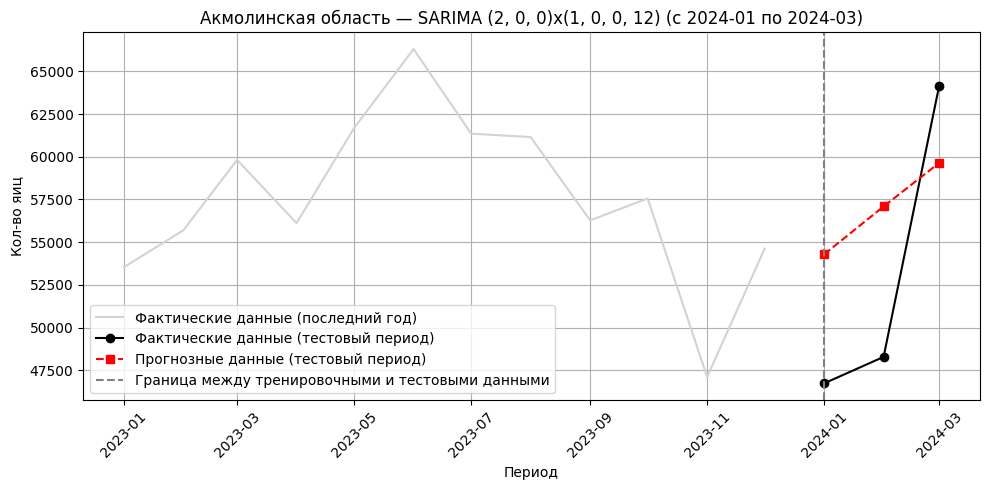

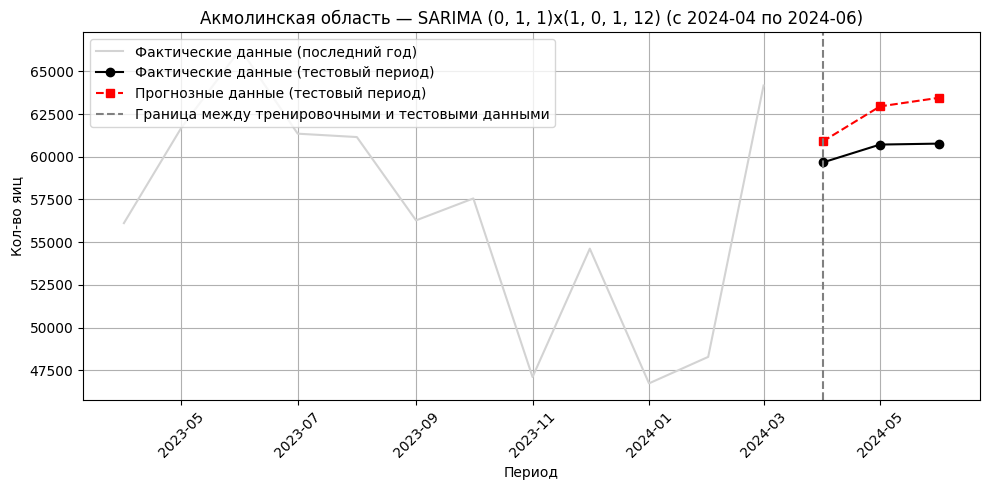

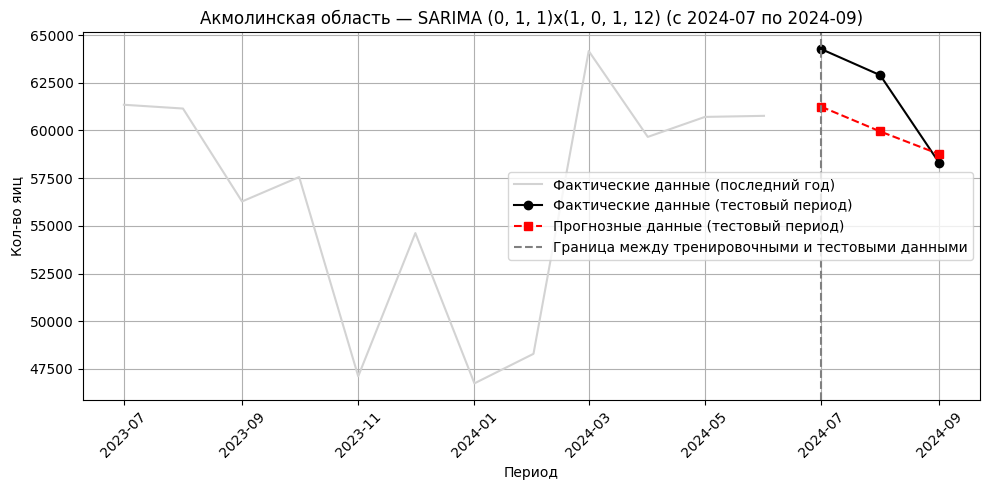

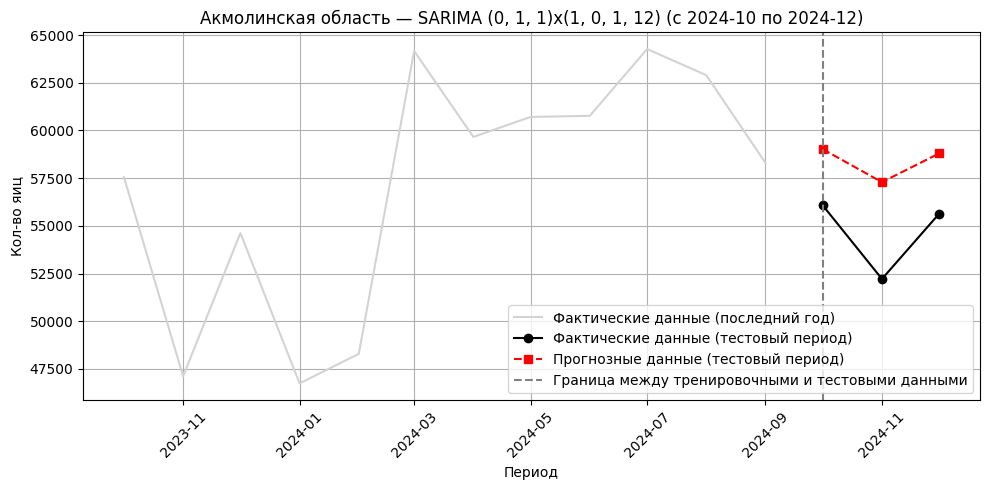

In [49]:
results = []

# –û–ø—Ä–µ–¥–µ–ª–∏–º 4 —Ç–µ—Å—Ç–æ–≤—ã—Ö –ø–µ—Ä–∏–æ–¥–∞ –Ω–∞ 3 –º–µ—Å—è—Ü–∞
start_dates = ["2024-01", "2024-04", "2024-07", "2024-10"]

for start in start_dates:
    test_start = pd.to_datetime(start)
    test_end = test_start + pd.DateOffset(months=3) - pd.DateOffset(days=1)

    # –†–∞–∑–¥–µ–ª–∏–º –¥–∞–Ω–Ω—ã–µ
    train_df = df[df["–ü–µ—Ä–∏–æ–¥"] < test_start]
    test_df = df[(df["–ü–µ—Ä–∏–æ–¥"] >= test_start) & (df["–ü–µ—Ä–∏–æ–¥"] <= test_end)]

    y_train = train_df[target].reset_index(drop=True)
    y_test = test_df[target].reset_index(drop=True)

    try:
        model = auto_arima(
            y_train,
            seasonal=True,
            m=12,
            stepwise=True,
            suppress_warnings=True,
            error_action="ignore"
        )

        forecast = model.predict(n_periods=3)
        forecast = pd.Series(forecast).reset_index(drop=True)


        # –û—Ü–µ–Ω–∫–∞
        rmse = np.sqrt(mean_squared_error(y_test, forecast))
        mae = mean_absolute_error(y_test, forecast)
        mape = (np.abs((y_test - forecast) / y_test).mean()) * 100

        results.append({
            "Test period": f"{start} to {test_end.strftime('%Y-%m')}",
            "RMSE": rmse,
            "MAE": mae,
            "MAPE (%)": mape,
            "SARIMA order": model.order,
            "Seasonal order": model.seasonal_order
        })

        # –ì—Ä–∞—Ñ–∏–∫
        plt.figure(figsize=(10, 5))
        last_train = train_df[train_df["–ü–µ—Ä–∏–æ–¥"] >= (test_start - pd.DateOffset(months=12))]
        plt.plot(last_train["–ü–µ—Ä–∏–æ–¥"], last_train[target], color="lightgray", label="–§–∞–∫—Ç–∏—á–µ—Å–∫–∏–µ –¥–∞–Ω–Ω—ã–µ (–ø–æ—Å–ª–µ–¥–Ω–∏–π –≥–æ–¥)")
        plt.plot(test_df["–ü–µ—Ä–∏–æ–¥"], y_test, marker="o", color="black", label="–§–∞–∫—Ç–∏—á–µ—Å–∫–∏–µ –¥–∞–Ω–Ω—ã–µ (—Ç–µ—Å—Ç–æ–≤—ã–π –ø–µ—Ä–∏–æ–¥)")
        plt.plot(test_df["–ü–µ—Ä–∏–æ–¥"], forecast, marker="s", linestyle="--", color="red", label="–ü—Ä–æ–≥–Ω–æ–∑–Ω—ã–µ –¥–∞–Ω–Ω—ã–µ (—Ç–µ—Å—Ç–æ–≤—ã–π –ø–µ—Ä–∏–æ–¥)")
        plt.axvline(test_start, color="gray", linestyle="--", label="–ì—Ä–∞–Ω–∏—Ü–∞ –º–µ–∂–¥—É —Ç—Ä–µ–Ω–∏—Ä–æ–≤–æ—á–Ω—ã–º–∏ –∏ —Ç–µ—Å—Ç–æ–≤—ã–º–∏ –¥–∞–Ω–Ω—ã–º–∏")
        plt.title(f"–ê–∫–º–æ–ª–∏–Ω—Å–∫–∞—è –æ–±–ª–∞—Å—Ç—å ‚Äî SARIMA {model.order}x{model.seasonal_order} (—Å {test_start.strftime('%Y-%m')} –ø–æ {test_end.strftime('%Y-%m')})")
        plt.xlabel("–ü–µ—Ä–∏–æ–¥")
        plt.ylabel("–ö–æ–ª-–≤–æ —è–∏—Ü")
        plt.legend()
        plt.grid(True)
        plt.xticks(rotation=45)
        plt.tight_layout()
        plt.show()
        # print("Zero values in y_test:", (y_test == 0).sum())


    except Exception as e:
        print(f"‚ö†Ô∏è –û—à–∏–±–∫–∞ –≤ –ø–µ—Ä–∏–æ–¥–µ {start}: {e}")

In [50]:
# –í—ã–≤–æ–¥ –º–µ—Ç—Ä–∏–∫
results_df = pd.DataFrame(results)
avg_row = results_df[["RMSE", "MAE", "MAPE (%)"]].mean().to_dict()
avg_row["Test period"] = "Average"
results_df = pd.concat([results_df, pd.DataFrame([avg_row])], ignore_index=True)

print(results_df)


          Test period         RMSE          MAE   MAPE (%) SARIMA order  \
0  2024-01 to 2024-03  7186.879696  6959.191512  13.811408    (2, 0, 0)   
1  2024-04 to 2024-06  2138.188353  2050.444703   3.387888    (0, 1, 1)   
2  2024-07 to 2024-09  2452.637008  2143.237808   3.392359    (0, 1, 1)   
3  2024-10 to 2024-12  3849.313548  3728.218518   6.886614    (0, 1, 1)   
4             Average  3906.754651  3720.273135   6.869567          NaN   

  Seasonal order  
0  (1, 0, 0, 12)  
1  (1, 0, 1, 12)  
2  (1, 0, 1, 12)  
3  (1, 0, 1, 12)  
4            NaN  


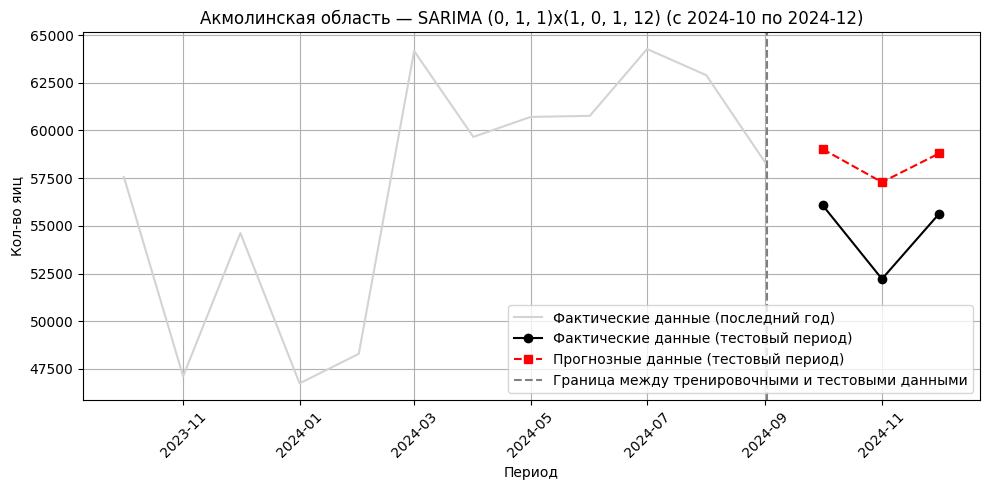

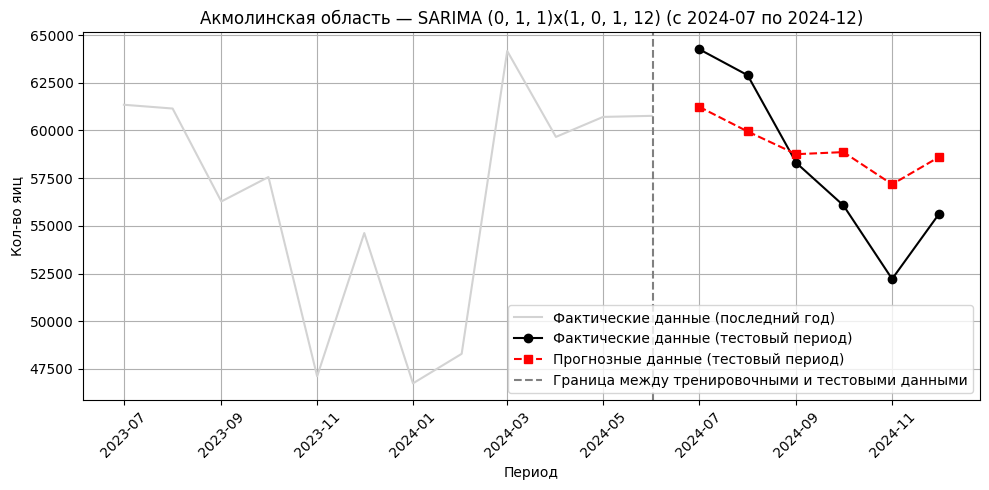

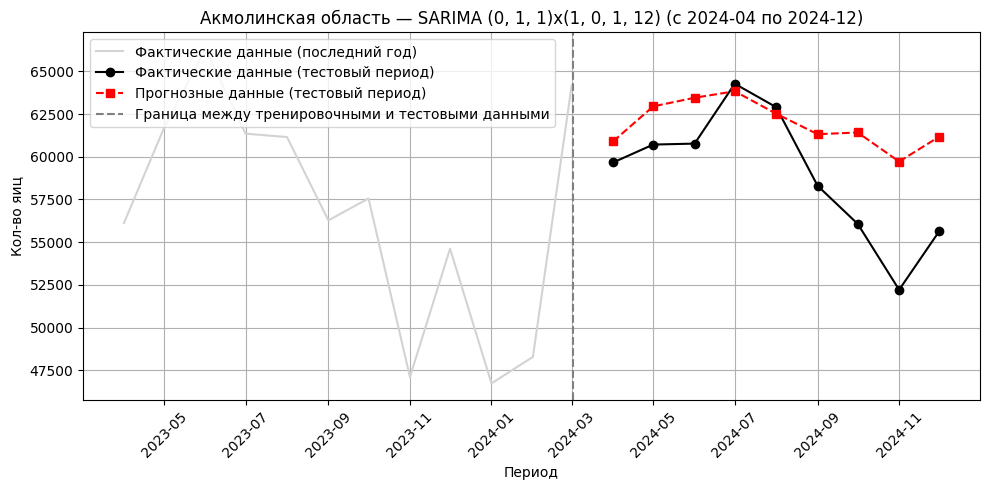

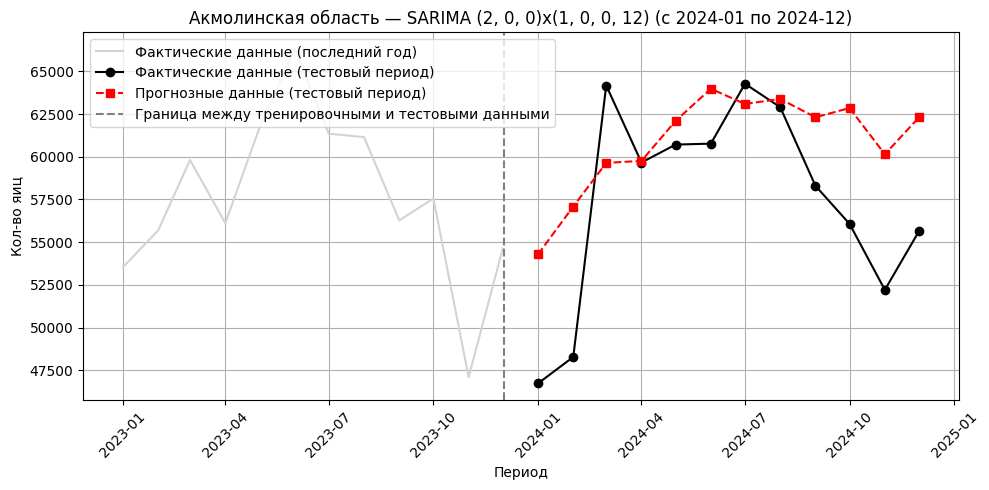

In [51]:
results = []

horizons = [3, 6, 9, 12]

for horizon in horizons:

    test_end = pd.to_datetime("2024-12")
    test_start = test_end - pd.DateOffset(months=horizon) + pd.DateOffset(days=1)
    
    train_df = df[df["–ü–µ—Ä–∏–æ–¥"] < test_start]
    test_df = df[(df["–ü–µ—Ä–∏–æ–¥"] >= test_start) & (df["–ü–µ—Ä–∏–æ–¥"] <= test_end)]

    y_train = train_df[target].reset_index(drop=True)
    y_test = test_df[target].reset_index(drop=True)

    try:
        model = auto_arima(
            y_train,
            seasonal=True,
            m=12,
            stepwise=True,
            suppress_warnings=True,
            error_action="ignore"
        )

        forecast = model.predict(n_periods=horizon)
        forecast = pd.Series(forecast).reset_index(drop=True)

        # –û—Ü–µ–Ω–∫–∞
        rmse = np.sqrt(mean_squared_error(y_test, forecast))
        mae = mean_absolute_error(y_test, forecast)
        mape = (np.abs((y_test - forecast) / y_test).mean()) * 100

        results.append({
            "Test period": f"{(test_start + pd.DateOffset(months=1)).strftime('%Y-%m')} to {test_end.strftime('%Y-%m')}",
            "RMSE": rmse,
            "MAE": mae,
            "MAPE (%)": mape,
            "SARIMA order": model.order,
            "Seasonal order": model.seasonal_order
        })

        # –ì—Ä–∞—Ñ–∏–∫
        plt.figure(figsize=(10, 5))
        last_train = train_df[train_df["–ü–µ—Ä–∏–æ–¥"] >= (test_start - pd.DateOffset(months=12))]
        plt.plot(last_train["–ü–µ—Ä–∏–æ–¥"], last_train[target], color="lightgray", label="–§–∞–∫—Ç–∏—á–µ—Å–∫–∏–µ –¥–∞–Ω–Ω—ã–µ (–ø–æ—Å–ª–µ–¥–Ω–∏–π –≥–æ–¥)")
        plt.plot(test_df["–ü–µ—Ä–∏–æ–¥"], y_test, marker="o", color="black", label="–§–∞–∫—Ç–∏—á–µ—Å–∫–∏–µ –¥–∞–Ω–Ω—ã–µ (—Ç–µ—Å—Ç–æ–≤—ã–π –ø–µ—Ä–∏–æ–¥)")
        plt.plot(test_df["–ü–µ—Ä–∏–æ–¥"], forecast, marker="s", linestyle="--", color="red", label="–ü—Ä–æ–≥–Ω–æ–∑–Ω—ã–µ –¥–∞–Ω–Ω—ã–µ (—Ç–µ—Å—Ç–æ–≤—ã–π –ø–µ—Ä–∏–æ–¥)")
        plt.axvline(test_start, color="gray", linestyle="--", label="–ì—Ä–∞–Ω–∏—Ü–∞ –º–µ–∂–¥—É —Ç—Ä–µ–Ω–∏—Ä–æ–≤–æ—á–Ω—ã–º–∏ –∏ —Ç–µ—Å—Ç–æ–≤—ã–º–∏ –¥–∞–Ω–Ω—ã–º–∏")
        plt.title(f"–ê–∫–º–æ–ª–∏–Ω—Å–∫–∞—è –æ–±–ª–∞—Å—Ç—å ‚Äî SARIMA {model.order}x{model.seasonal_order} (—Å {(test_start + pd.DateOffset(months=1)).strftime('%Y-%m')} –ø–æ {test_end.strftime('%Y-%m')})")
        plt.xlabel("–ü–µ—Ä–∏–æ–¥")
        plt.ylabel("–ö–æ–ª-–≤–æ —è–∏—Ü")
        plt.legend()
        plt.grid(True)
        plt.xticks(rotation=45)
        plt.tight_layout()
        plt.show()

    except Exception as e:
        print(f"‚ö†Ô∏è –û—à–∏–±–∫–∞ –≤ –ø–µ—Ä–∏–æ–¥–µ {start}: {e}")

In [52]:
# –í—ã–≤–æ–¥ –º–µ—Ç—Ä–∏–∫
results_df = pd.DataFrame(results)
avg_row = results_df[["RMSE", "MAE", "MAPE (%)"]].mean().to_dict()
avg_row["Test period"] = "Average"
results_df = pd.concat([results_df, pd.DataFrame([avg_row])], ignore_index=True)

print(results_df)


          Test period         RMSE          MAE  MAPE (%) SARIMA order  \
0  2024-10 to 2024-12  3849.313548  3728.218518  6.886614    (0, 1, 1)   
1  2024-07 to 2024-12  3144.711443  2860.206519  5.001877    (0, 1, 1)   
2  2024-04 to 2024-12  3925.144310  3152.550742  5.608906    (0, 1, 1)   
3  2024-01 to 2024-12  5308.242711  4384.356049  8.157648    (2, 0, 0)   
4             Average  4056.853003  3531.332957  6.413761          NaN   

  Seasonal order  
0  (1, 0, 1, 12)  
1  (1, 0, 1, 12)  
2  (1, 0, 1, 12)  
3  (1, 0, 0, 12)  
4            NaN  


#### SARIMAX

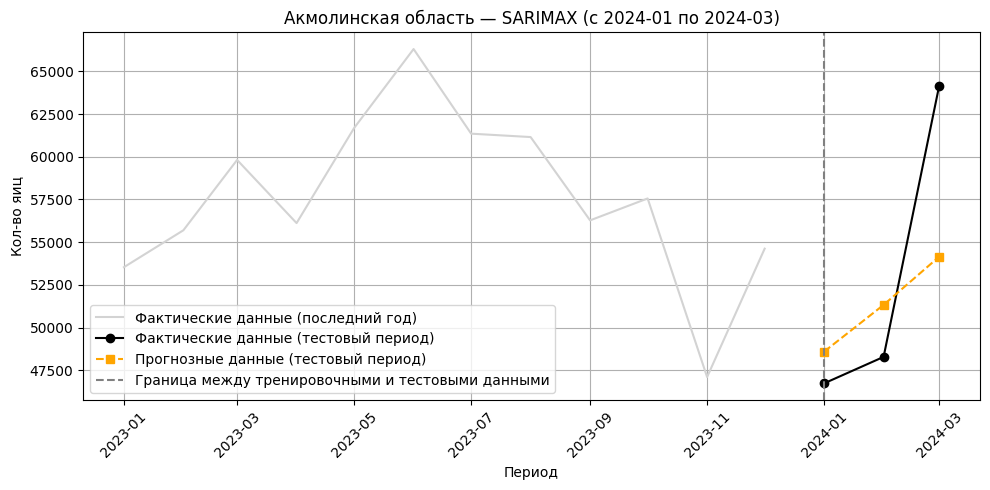

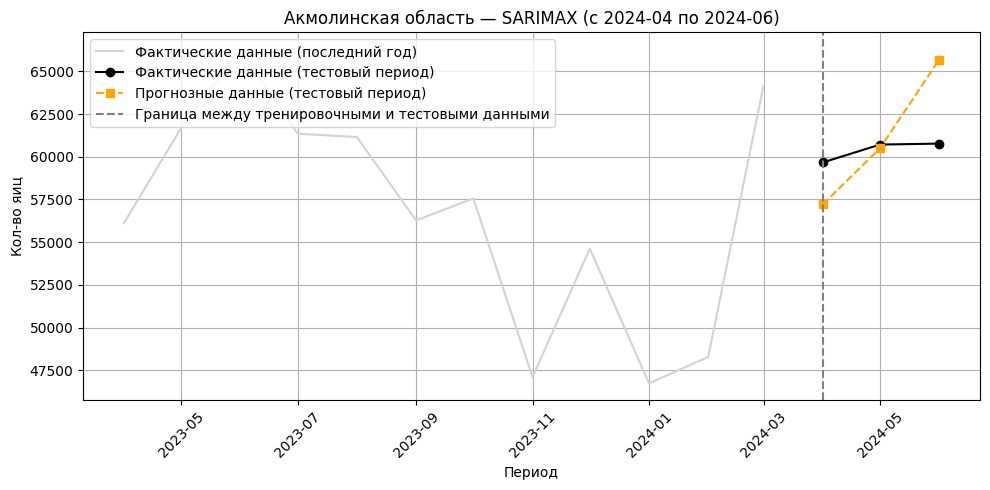

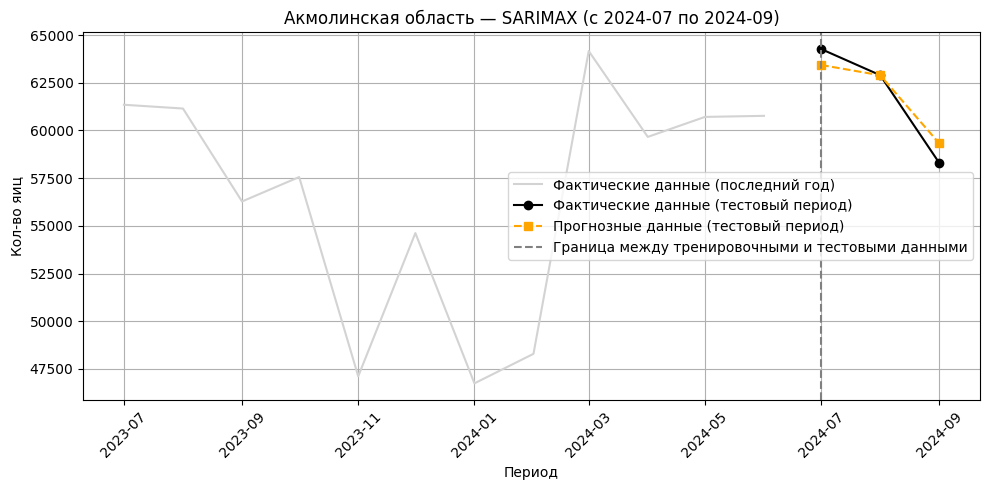

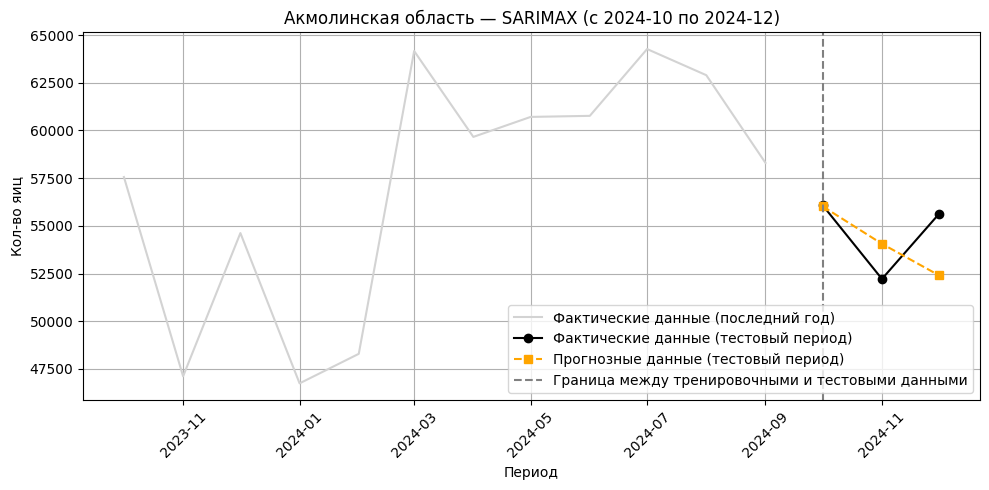

In [53]:
results = []

start_dates = ["2024-01", "2024-04", "2024-07", "2024-10"]

for start in start_dates:
    test_start = pd.to_datetime(start)
    test_end = test_start + pd.DateOffset(months=3) - pd.DateOffset(days=1)

    # Split
    train_df = df[df["–ü–µ—Ä–∏–æ–¥"] < test_start]
    test_df = df[(df["–ü–µ—Ä–∏–æ–¥"] >= test_start) & (df["–ü–µ—Ä–∏–æ–¥"] <= test_end)]

    y_train = train_df[target].reset_index(drop=True)
    y_test = test_df[target].reset_index(drop=True)

    exog_train = train_df[features].reset_index(drop=True)
    exog_test = test_df[features].reset_index(drop=True)

    try:
        model = SARIMAX(
            endog=y_train,
            exog=exog_train,
            order=(0, 1, 1),
            seasonal_order=(1, 0, 1, 12),
            enforce_stationarity=False,
            enforce_invertibility=False
        ).fit(disp=False)

        forecast_res = model.get_forecast(steps=3, exog=exog_test)
        forecast = forecast_res.predicted_mean.reset_index(drop=True)

        rmse = np.sqrt(mean_squared_error(y_test, forecast))
        mae = mean_absolute_error(y_test, forecast)
        mape = (np.abs((y_test - forecast) / y_test).mean()) * 100

        results.append({
            "Test period": f"{start} to {test_end.strftime('%Y-%m')}",
            "RMSE": rmse,
            "MAE": mae,
            "MAPE (%)": mape,
            "SARIMA order": model.model_orders["ar"],
            "Seasonal order": model.model_orders.get("seasonal_ar", None)
        })

        # Plot
        plt.figure(figsize=(10, 5))
        last_train = train_df[train_df["–ü–µ—Ä–∏–æ–¥"] >= (test_start - pd.DateOffset(months=12))]
        plt.plot(last_train["–ü–µ—Ä–∏–æ–¥"], last_train[target], color="lightgray", label="–§–∞–∫—Ç–∏—á–µ—Å–∫–∏–µ –¥–∞–Ω–Ω—ã–µ (–ø–æ—Å–ª–µ–¥–Ω–∏–π –≥–æ–¥)")
        plt.plot(test_df["–ü–µ—Ä–∏–æ–¥"], y_test, marker="o", color="black", label="–§–∞–∫—Ç–∏—á–µ—Å–∫–∏–µ –¥–∞–Ω–Ω—ã–µ (—Ç–µ—Å—Ç–æ–≤—ã–π –ø–µ—Ä–∏–æ–¥)")
        plt.plot(test_df["–ü–µ—Ä–∏–æ–¥"], forecast, marker="s", linestyle="--", color="orange", label="–ü—Ä–æ–≥–Ω–æ–∑–Ω—ã–µ –¥–∞–Ω–Ω—ã–µ (—Ç–µ—Å—Ç–æ–≤—ã–π –ø–µ—Ä–∏–æ–¥)")
        plt.axvline(test_start, color="gray", linestyle="--", label="–ì—Ä–∞–Ω–∏—Ü–∞ –º–µ–∂–¥—É —Ç—Ä–µ–Ω–∏—Ä–æ–≤–æ—á–Ω—ã–º–∏ –∏ —Ç–µ—Å—Ç–æ–≤—ã–º–∏ –¥–∞–Ω–Ω—ã–º–∏")
        plt.title(f"–ê–∫–º–æ–ª–∏–Ω—Å–∫–∞—è –æ–±–ª–∞—Å—Ç—å ‚Äî SARIMAX (—Å {start} –ø–æ {test_end.strftime('%Y-%m')})")
        plt.xlabel("–ü–µ—Ä–∏–æ–¥")
        plt.ylabel("–ö–æ–ª-–≤–æ —è–∏—Ü")
        plt.legend()
        plt.grid(True)
        plt.xticks(rotation=45)
        plt.tight_layout()
        plt.show()

    except Exception as e:
        print(f"‚ö†Ô∏è –û—à–∏–±–∫–∞ –≤ –ø–µ—Ä–∏–æ–¥–µ {start}: {e}")


In [54]:
# –í—ã–≤–æ–¥ –º–µ—Ç—Ä–∏–∫ –¥–ª—è SARIMAX
results_df = pd.DataFrame(results)

# –°—Ä–µ–¥–Ω–∏–µ –∑–Ω–∞—á–µ–Ω–∏—è –ø–æ –º–µ—Ç—Ä–∏–∫–∞–º
avg_metrics = results_df[["RMSE", "MAE", "MAPE (%)"]].mean().to_dict()
avg_metrics["Test period"] = "Average"
avg_metrics["SARIMA order"] = ""
avg_metrics["Seasonal order"] = ""

# –î–æ–±–∞–≤–∏–º —Å—Ç—Ä–æ–∫—É —Å–æ —Å—Ä–µ–¥–Ω–∏–º–∏ –∑–Ω–∞—á–µ–Ω–∏—è–º–∏
results_df = pd.concat([results_df, pd.DataFrame([avg_metrics])], ignore_index=True)

# –í—ã–≤–æ–¥
print(results_df)



          Test period         RMSE          MAE  MAPE (%) SARIMA order  \
0  2024-01 to 2024-03  6136.568283  4971.096037  8.626659            0   
1  2024-04 to 2024-06  3172.758347  2525.653049  4.181270            0   
2  2024-07 to 2024-09   763.358249   621.739522  1.021835            0   
3  2024-10 to 2024-12  2154.341094  1713.882103  3.152523            0   
4             Average  3056.756493  2458.092677  4.245572                

  Seasonal order  
0             12  
1             12  
2             12  
3             12  
4                 


In [ ]:
results = []

horizons = [3, 6, 9, 12]

for horizon in horizons:
    # test_start = pd.to_datetime(start)
    # test_end = test_start + pd.DateOffset(months=3) - pd.DateOffset(days=1)
    test_end = pd.to_datetime("2024-12")
    test_start = test_end - pd.DateOffset(months=horizon) + pd.DateOffset(days=1)

    # Split
    train_df = df[df["–ü–µ—Ä–∏–æ–¥"] < test_start]
    test_df = df[(df["–ü–µ—Ä–∏–æ–¥"] >= test_start) & (df["–ü–µ—Ä–∏–æ–¥"] <= test_end)]

    y_train = train_df[target].reset_index(drop=True)
    y_test = test_df[target].reset_index(drop=True)

    exog_train = train_df[features].reset_index(drop=True)
    exog_test = test_df[features].reset_index(drop=True)

    try:
        model = SARIMAX(
            endog=y_train,
            exog=exog_train,
            order=(0, 1, 1),
            seasonal_order=(1, 0, 1, 12),
            enforce_stationarity=False,
            enforce_invertibility=False
        ).fit(disp=False)

        forecast_res = model.get_forecast(steps=horizon, exog=exog_test)
        forecast = forecast_res.predicted_mean.reset_index(drop=True)

        rmse = np.sqrt(mean_squared_error(y_test, forecast))
        mae = mean_absolute_error(y_test, forecast)
        mape = (np.abs((y_test - forecast) / y_test).mean()) * 100

        results.append({
            "Test period": f"{(test_start + pd.DateOffset(months=1)).strftime('%Y-%m')} to {test_end.strftime('%Y-%m')}",
            "RMSE": rmse,
            "MAE": mae,
            "MAPE (%)": mape,
            "SARIMA order": model.model_orders["ar"],
            "Seasonal order": model.model_orders.get("seasonal_ar", None)
        })

        # Plot
        plt.figure(figsize=(10, 5))
        last_train = train_df[train_df["–ü–µ—Ä–∏–æ–¥"] >= (test_start - pd.DateOffset(months=12))]
        plt.plot(last_train["–ü–µ—Ä–∏–æ–¥"], last_train[target], color="lightgray", label="–§–∞–∫—Ç–∏—á–µ—Å–∫–∏–µ –¥–∞–Ω–Ω—ã–µ (–ø–æ—Å–ª–µ–¥–Ω–∏–π –≥–æ–¥)")
        plt.plot(test_df["–ü–µ—Ä–∏–æ–¥"], y_test, marker="o", color="black", label="–§–∞–∫—Ç–∏—á–µ—Å–∫–∏–µ –¥–∞–Ω–Ω—ã–µ (—Ç–µ—Å—Ç–æ–≤—ã–π –ø–µ—Ä–∏–æ–¥)")
        plt.plot(test_df["–ü–µ—Ä–∏–æ–¥"], forecast, marker="s", linestyle="--", color="orange", label="–ü—Ä–æ–≥–Ω–æ–∑–Ω—ã–µ –¥–∞–Ω–Ω—ã–µ (—Ç–µ—Å—Ç–æ–≤—ã–π –ø–µ—Ä–∏–æ–¥)")
        plt.axvline(test_start, color="gray", linestyle="--", label="–ì—Ä–∞–Ω–∏—Ü–∞ –º–µ–∂–¥—É —Ç—Ä–µ–Ω–∏—Ä–æ–≤–æ—á–Ω—ã–º–∏ –∏ —Ç–µ—Å—Ç–æ–≤—ã–º–∏ –¥–∞–Ω–Ω—ã–º–∏")
        plt.title(f"–ê–∫–º–æ–ª–∏–Ω—Å–∫–∞—è –æ–±–ª–∞—Å—Ç—å ‚Äî SARIMAX (—Å {(test_start + pd.DateOffset(months=1)).strftime('%Y-%m')} –ø–æ {test_end.strftime('%Y-%m')})")
        plt.xlabel("–ü–µ—Ä–∏–æ–¥")
        plt.ylabel("–ö–æ–ª-–≤–æ —è–∏—Ü")
        plt.legend()
        plt.grid(True)
        plt.xticks(rotation=45)
        plt.tight_layout()
        plt.show()

    except Exception as e:
        print(f"‚ö†Ô∏è –û—à–∏–±–∫–∞ –≤ –ø–µ—Ä–∏–æ–¥–µ {start}: {e}")


In [ ]:
# –í—ã–≤–æ–¥ –º–µ—Ç—Ä–∏–∫ –¥–ª—è SARIMAX
results_df = pd.DataFrame(results)

# –°—Ä–µ–¥–Ω–∏–µ –∑–Ω–∞—á–µ–Ω–∏—è –ø–æ –º–µ—Ç—Ä–∏–∫–∞–º
avg_metrics = results_df[["RMSE", "MAE", "MAPE (%)"]].mean().to_dict()
avg_metrics["Test period"] = "Average"
avg_metrics["SARIMA order"] = ""
avg_metrics["Seasonal order"] = ""

# –î–æ–±–∞–≤–∏–º —Å—Ç—Ä–æ–∫—É —Å–æ —Å—Ä–µ–¥–Ω–∏–º–∏ –∑–Ω–∞—á–µ–Ω–∏—è–º–∏
results_df = pd.concat([results_df, pd.DataFrame([avg_metrics])], ignore_index=True)

# –í—ã–≤–æ–¥
print(results_df)

#### Prophet

20:40:33 - cmdstanpy - INFO - Chain [1] start processing
20:40:33 - cmdstanpy - INFO - Chain [1] done processing


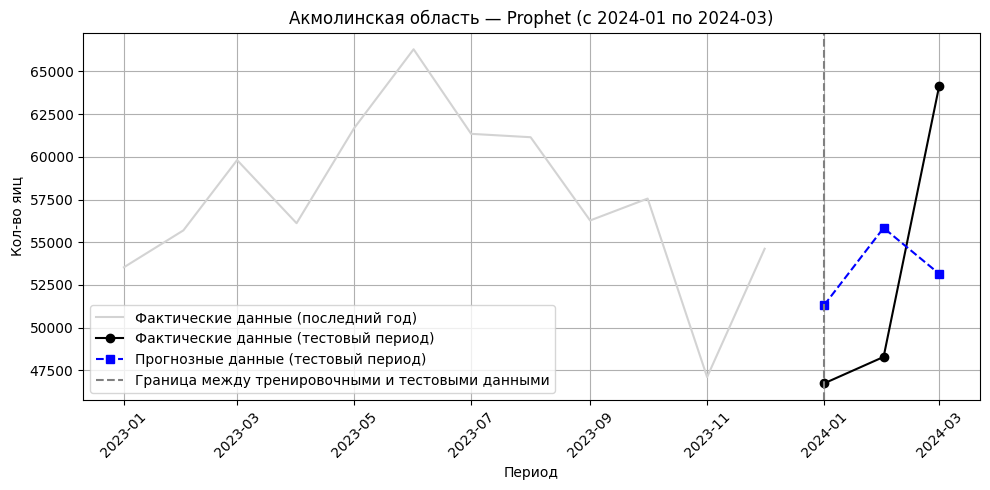

20:40:33 - cmdstanpy - INFO - Chain [1] start processing
20:40:33 - cmdstanpy - INFO - Chain [1] done processing


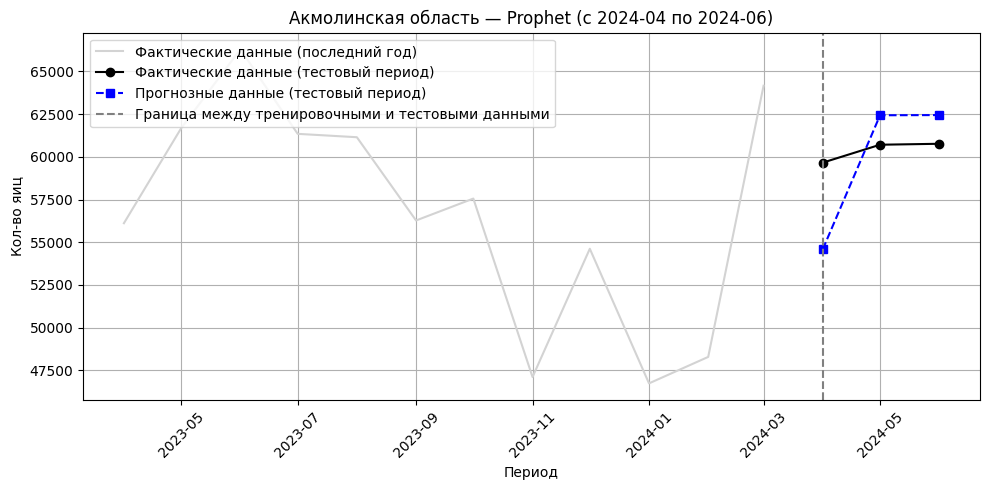

20:40:34 - cmdstanpy - INFO - Chain [1] start processing
20:40:34 - cmdstanpy - INFO - Chain [1] done processing


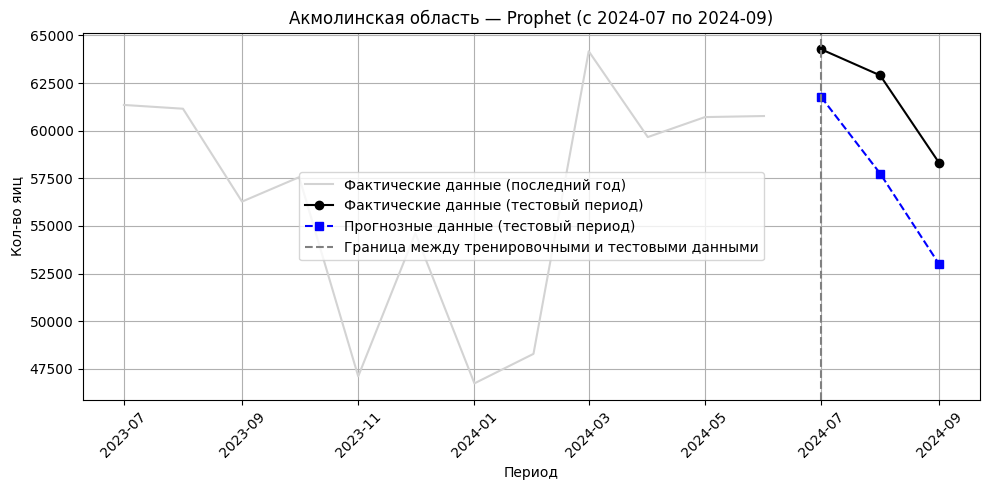

20:40:34 - cmdstanpy - INFO - Chain [1] start processing
20:40:34 - cmdstanpy - INFO - Chain [1] done processing


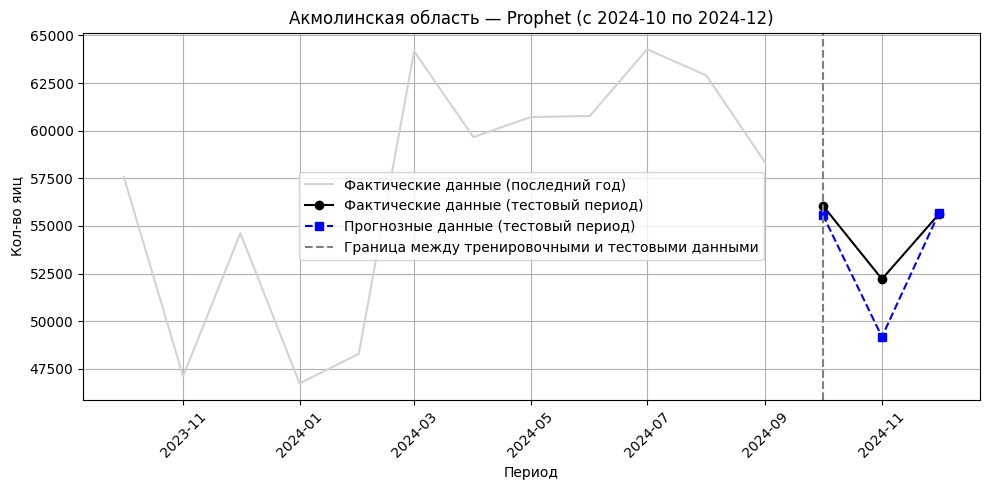

In [57]:
results = []

# Define 4 test periods
start_dates = ["2024-01", "2024-04", "2024-07", "2024-10"]

for start in start_dates:
    test_start = pd.to_datetime(start)
    test_end = test_start + pd.DateOffset(months=3) - pd.DateOffset(days=1)

    # Train/test split
    train_df = df[df["–ü–µ—Ä–∏–æ–¥"] < test_start].copy()
    test_df = df[(df["–ü–µ—Ä–∏–æ–¥"] >= test_start) & (df["–ü–µ—Ä–∏–æ–¥"] <= test_end)].copy()

    # Prophet format
    prophet_train = train_df[["–ü–µ—Ä–∏–æ–¥", target]].rename(columns={"–ü–µ—Ä–∏–æ–¥": "ds", target: "y"})
    prophet_test = test_df[["–ü–µ—Ä–∏–æ–¥", target]].rename(columns={"–ü–µ—Ä–∏–æ–¥": "ds", target: "y"})

    # Initialize Prophet
    model = Prophet()

    # Optional: add regressors
    # model.add_regressor("–¢–µ–º–ø–µ—Ä–∞—Ç—É—Ä–∞_t-1")
    # prophet_train["–¢–µ–º–ø–µ—Ä–∞—Ç—É—Ä–∞_t-1"] = train_df["–¢–µ–º–ø–µ—Ä–∞—Ç—É—Ä–∞_t-1"].values
    # prophet_test["–¢–µ–º–ø–µ—Ä–∞—Ç—É—Ä–∞_t-1"] = test_df["–¢–µ–º–ø–µ—Ä–∞—Ç—É—Ä–∞_t-1"].values

    # Fit
    model.fit(prophet_train)

    # Create future dataframe
    future = model.make_future_dataframe(periods=3, freq="M")
    forecast = model.predict(future)
# forecast
# prophet_test

    # Extract forecast for test period only
    forecast_test = forecast[forecast["ds"].isin(prophet_test["ds"] - pd.DateOffset(days=1))].copy()
    y_pred = forecast_test["yhat"].values
    y_true = prophet_test["y"].values

    # Evaluate
    rmse = np.sqrt(mean_squared_error(y_true, y_pred))
    mae = mean_absolute_error(y_true, y_pred)
    mape = (np.abs((y_true - y_pred) / y_true).mean()) * 100

    results.append({
        "Test period": f"{start} to {test_end.strftime('%Y-%m')}",
        "RMSE": rmse,
        "MAE": mae,
        "MAPE (%)": mape
    })

    # Plot
    plt.figure(figsize=(10, 5))
    last_train = train_df[train_df["–ü–µ—Ä–∏–æ–¥"] >= (test_start - pd.DateOffset(months=12))]
    plt.plot(last_train["–ü–µ—Ä–∏–æ–¥"], last_train[target], color="lightgray", label="–§–∞–∫—Ç–∏—á–µ—Å–∫–∏–µ –¥–∞–Ω–Ω—ã–µ (–ø–æ—Å–ª–µ–¥–Ω–∏–π –≥–æ–¥)")
    plt.plot(test_df["–ü–µ—Ä–∏–æ–¥"], test_df[target], marker="o", color="black", label="–§–∞–∫—Ç–∏—á–µ—Å–∫–∏–µ –¥–∞–Ω–Ω—ã–µ (—Ç–µ—Å—Ç–æ–≤—ã–π –ø–µ—Ä–∏–æ–¥)")
    plt.plot(test_df["–ü–µ—Ä–∏–æ–¥"], y_pred, marker="s", linestyle="--", color="blue", label="–ü—Ä–æ–≥–Ω–æ–∑–Ω—ã–µ –¥–∞–Ω–Ω—ã–µ (—Ç–µ—Å—Ç–æ–≤—ã–π –ø–µ—Ä–∏–æ–¥)")
    plt.axvline(test_start, color="gray", linestyle="--", label="–ì—Ä–∞–Ω–∏—Ü–∞ –º–µ–∂–¥—É —Ç—Ä–µ–Ω–∏—Ä–æ–≤–æ—á–Ω—ã–º–∏ –∏ —Ç–µ—Å—Ç–æ–≤—ã–º–∏ –¥–∞–Ω–Ω—ã–º–∏")
    plt.title(f"–ê–∫–º–æ–ª–∏–Ω—Å–∫–∞—è –æ–±–ª–∞—Å—Ç—å ‚Äî Prophet (—Å {start} –ø–æ {test_end.strftime('%Y-%m')})")
    plt.xlabel("–ü–µ—Ä–∏–æ–¥")
    plt.ylabel("–ö–æ–ª-–≤–æ —è–∏—Ü")
    plt.legend()
    plt.grid(True)
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()



In [58]:
results_df = pd.DataFrame(results)
avg = results_df[["RMSE", "MAE", "MAPE (%)"]].mean().to_dict()
avg["Test period"] = "Average"
results_df = pd.concat([results_df, pd.DataFrame([avg])], ignore_index=True)
print(results_df)

          Test period         RMSE          MAE   MAPE (%)
0  2024-01 to 2024-03  8152.146268  7715.994323  14.201970
1  2024-04 to 2024-06  3243.419354  2827.005206   4.704546
2  2024-07 to 2024-09  4512.010543  4324.206312   7.068725
3  2024-10 to 2024-12  1774.306054  1194.252585   2.263415
4             Average  4420.470555  4015.364606   7.059664


20:40:44 - cmdstanpy - INFO - Chain [1] start processing
20:40:44 - cmdstanpy - INFO - Chain [1] done processing


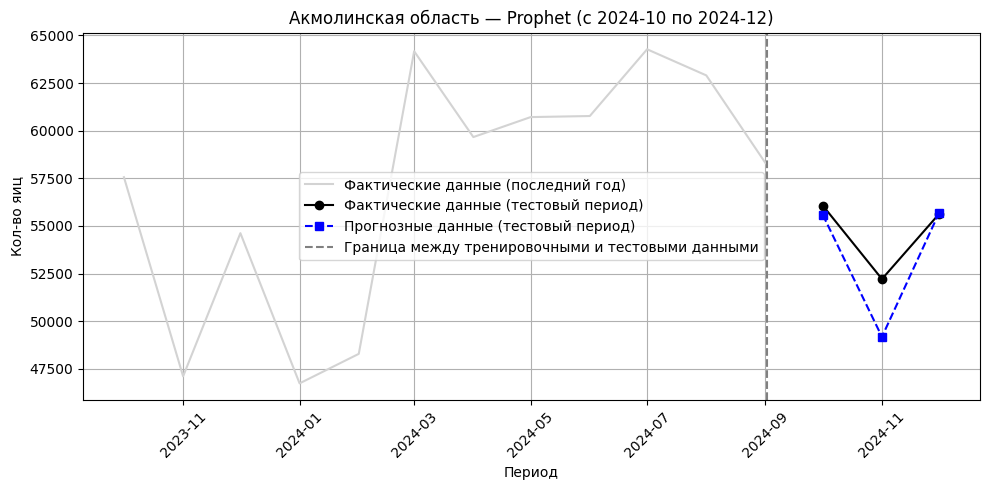

20:40:45 - cmdstanpy - INFO - Chain [1] start processing
20:40:45 - cmdstanpy - INFO - Chain [1] done processing


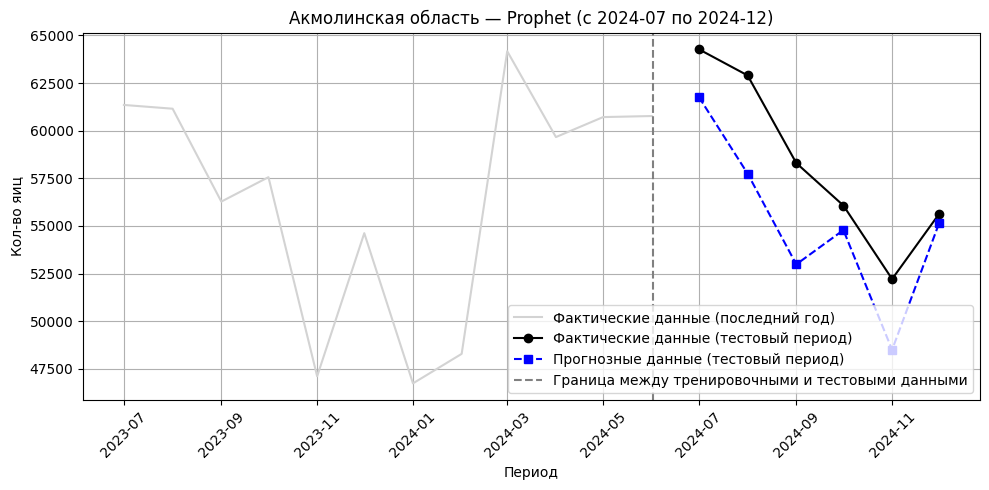

20:40:45 - cmdstanpy - INFO - Chain [1] start processing
20:40:45 - cmdstanpy - INFO - Chain [1] done processing


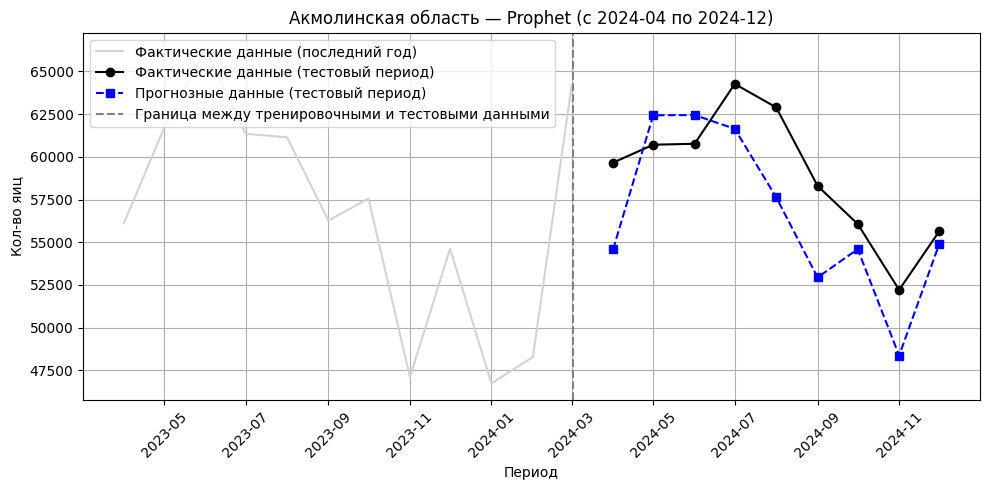

20:40:46 - cmdstanpy - INFO - Chain [1] start processing
20:40:46 - cmdstanpy - INFO - Chain [1] done processing


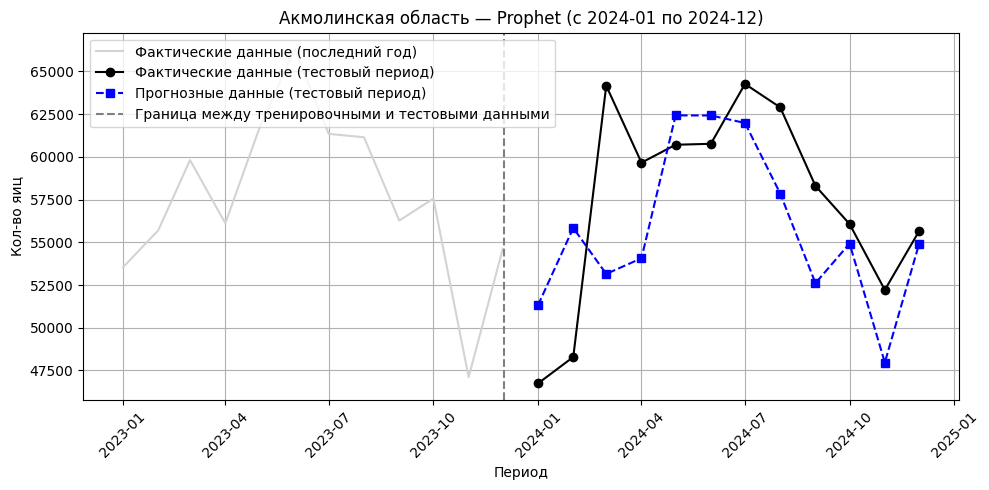

In [59]:
horizons = [3, 6, 9, 12]
results = []

for horizon in horizons:

    # Define train/test split
    test_end = pd.to_datetime("2024-12")
    test_start = test_end - pd.DateOffset(months=horizon) + pd.DateOffset(days=1)

    train_df = df[df["–ü–µ—Ä–∏–æ–¥"] < test_start].copy()
    test_df = df[(df["–ü–µ—Ä–∏–æ–¥"] >= test_start) & (df["–ü–µ—Ä–∏–æ–¥"] <= test_end)].copy()

    # Prophet format
    prophet_train = train_df[["–ü–µ—Ä–∏–æ–¥", target]].rename(columns={"–ü–µ—Ä–∏–æ–¥": "ds", target: "y"})
    prophet_test = test_df[["–ü–µ—Ä–∏–æ–¥", target]].rename(columns={"–ü–µ—Ä–∏–æ–¥": "ds", target: "y"})

    # Fit Prophet
    model = Prophet()
    model.fit(prophet_train)

    # Forecast
    future = model.make_future_dataframe(periods=horizon, freq="M")
    forecast = model.predict(future)

    # Extract matching forecasted months
    forecast_test = forecast[forecast["ds"].isin(prophet_test["ds"] - pd.DateOffset(days=1))].copy()
    y_pred = forecast_test["yhat"].values
    y_true = prophet_test["y"].values

    # Evaluation
    rmse = np.sqrt(mean_squared_error(y_true, y_pred))
    mae = mean_absolute_error(y_true, y_pred)
    mape = (np.abs((y_true - y_pred) / y_true).mean()) * 100

    results.append({
        "Test period": f"{(test_start + pd.DateOffset(months=1)).strftime('%Y-%m')} to {test_end.strftime('%Y-%m')}",
        "RMSE": rmse,
        "MAE": mae,
        "MAPE (%)": mape
    })

    # Plot
    plt.figure(figsize=(10, 5))
    last_train = train_df[train_df["–ü–µ—Ä–∏–æ–¥"] >= (test_start - pd.DateOffset(months=12))]
    plt.plot(last_train["–ü–µ—Ä–∏–æ–¥"], last_train[target], color="lightgray", label="–§–∞–∫—Ç–∏—á–µ—Å–∫–∏–µ –¥–∞–Ω–Ω—ã–µ (–ø–æ—Å–ª–µ–¥–Ω–∏–π –≥–æ–¥)")
    plt.plot(test_df["–ü–µ—Ä–∏–æ–¥"], test_df[target], marker="o", color="black", label="–§–∞–∫—Ç–∏—á–µ—Å–∫–∏–µ –¥–∞–Ω–Ω—ã–µ (—Ç–µ—Å—Ç–æ–≤—ã–π –ø–µ—Ä–∏–æ–¥)")
    plt.plot(test_df["–ü–µ—Ä–∏–æ–¥"], y_pred, marker="s", linestyle="--", color="blue", label="–ü—Ä–æ–≥–Ω–æ–∑–Ω—ã–µ –¥–∞–Ω–Ω—ã–µ (—Ç–µ—Å—Ç–æ–≤—ã–π –ø–µ—Ä–∏–æ–¥)")
    plt.axvline(test_start, color="gray", linestyle="--", label="–ì—Ä–∞–Ω–∏—Ü–∞ –º–µ–∂–¥—É —Ç—Ä–µ–Ω–∏—Ä–æ–≤–æ—á–Ω—ã–º–∏ –∏ —Ç–µ—Å—Ç–æ–≤—ã–º–∏ –¥–∞–Ω–Ω—ã–º–∏")
    plt.title(f"–ê–∫–º–æ–ª–∏–Ω—Å–∫–∞—è –æ–±–ª–∞—Å—Ç—å ‚Äî Prophet (—Å {(test_start + pd.DateOffset(months=1)).strftime('%Y-%m')} –ø–æ {test_end.strftime('%Y-%m')})")
    plt.xlabel("–ü–µ—Ä–∏–æ–¥")
    plt.ylabel("–ö–æ–ª-–≤–æ —è–∏—Ü")
    plt.legend()
    plt.grid(True)
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()




In [60]:
# Summary table
results_df = pd.DataFrame(results)
avg_row = results_df[["RMSE", "MAE", "MAPE (%)"]].mean().to_dict()
results_df = pd.concat([results_df, pd.DataFrame([avg_row])], ignore_index=True)

print(results_df)

          Test period         RMSE          MAE  MAPE (%)
0  2024-10 to 2024-12  1774.306054  1194.252585  2.263415
1  2024-07 to 2024-12  3576.895825  3075.626135  5.246257
2  2024-04 to 2024-12  3532.981410  3087.852097  5.231876
3  2024-01 to 2024-12  5158.736814  4274.503699  7.535464
4                 NaN  3510.730026  2908.058629  5.069253


strength of correlation:
https://link.springer.com/article/10.1057/jt.2009.5#
https://resources.nu.edu/statsresources/correlation